In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from itertools import permutations


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


1.a Descripción de cuantas variables hay en el dataset y cuantas observaciones.

In [2]:
#Cargado de archivos
#diabetes_mellitus  =  pd.read_excel('archivos/diabetes_mellitus.xlsx')
#matrimonios = pd.read_excel('archivos/matrimonios.xlsx')
#porcentaje_nacimientos = pd.read_excel('archivos/porcentaje_nacimientos.xlsx')
#tasaMortalidadInfantil = pd.read_excel('archivos/tasaMortalidadInfantil.xlsx')
#nacimientosResidenciaMadre = pd.read_excel('archivos/NacimientosResidenciaMadre.xlsx')
#mortalidadExterna = pd.read_excel('archivos/MortalidadExterna.xlsx')
#porcentajePesoNacer = pd.read_excel('archivos/PorcentajePesoNacer.xlsx')
#divorcios = pd.read_excel('archivos/Divorcios.xlsx')

mortalidadVIH_SIDA = pd.read_excel('archivos/MortalidadVIH_SIDA.xlsx')
defunciones = pd.read_excel('archivos/defunciones2.xlsx')



In [3]:

mortalidadVIH_SIDA.describe()
defunciones.describe()


,Depreg,Mupreg,Mesreg,Añoreg,Depocu,Mupocu,Areag,Sexo,Diaocu,Mesocu,...,Ecidif,Ocudif,Dnadif,Mnadif,Nacdif,Dredif,Mredif,Asist,Ocur,Cerdef
count,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,...,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.00000,71707.000000,71707.000000
mean,8.605757,866.551034,6.430321,9.016135,8.605073,866.543294,1.680031,1.423292,15.629520,6.475658,...,1.664803,9066.538985,16.278271,1682.061654,1.096309,11.753134,1184.903287,2.70869,3.102640,2.724574
std,6.687519,669.976160,3.435892,0.125996,6.687544,669.891405,1.401926,0.494084,8.806247,3.430338,...,1.501258,1437.087100,24.822250,2565.880825,9.104364,16.100507,1624.015508,1.50075,1.391381,3.184217
min,1.000000,101.000000,1.000000,9.000000,1.000000,101.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,110.000000,1.000000,101.000000,0.000000,1.000000,101.000000,1.00000,1.000000,1.000000
25%,1.000000,108.000000,3.000000,9.000000,1.000000,108.000000,1.000000,1.000000,8.000000,4.000000,...,1.000000,9211.000000,3.000000,306.000000,0.000000,3.000000,301.000000,1.00000,1.000000,1.000000
50%,9.000000,901.000000,6.000000,9.000000,9.000000,901.000000,1.000000,1.000000,16.000000,6.000000,...,1.000000,9711.000000,10.000000,1013.000000,0.000000,9.000000,922.000000,4.00000,4.000000,1.000000
75%,14.000000,1406.000000,9.000000,9.000000,14.000000,1406.000000,2.000000,2.000000,23.000000,9.000000,...,2.000000,9712.000000,16.000000,1612.000000,0.000000,15.000000,1504.000000,4.00000,4.000000,2.000000
max,22.000000,2217.000000,12.000000,10.000000,22.000000,2217.000000,9.000000,2.000000,31.000000,12.000000,...,9.000000,9999.000000,99.000000,9999.000000,99.000000,99.000000,9999.000000,9.00000,9.000000,9.000000


In [4]:
import warnings
warnings.filterwarnings('ignore')


#Mostrar información general del dataframe

defunciones.info()
defunciones.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71707 entries, 0 to 71706
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Depreg  71707 non-null  int64 
 1   Mupreg  71707 non-null  int64 
 2   Mesreg  71707 non-null  int64 
 3   Añoreg  71707 non-null  int64 
 4   Depocu  71707 non-null  int64 
 5   Mupocu  71707 non-null  int64 
 6   Areag   71707 non-null  int64 
 7   Sexo    71707 non-null  int64 
 8   Diaocu  71707 non-null  int64 
 9   Mesocu  71707 non-null  int64 
 10  Añoocu  71707 non-null  int64 
 11  Edadif  71707 non-null  int64 
 12  Perdif  71707 non-null  int64 
 13  Getdif  71707 non-null  int64 
 14  Ecidif  71707 non-null  int64 
 15  Ocudif  71707 non-null  int64 
 16  Dnadif  71707 non-null  int64 
 17  Mnadif  71707 non-null  int64 
 18  Nacdif  71707 non-null  int64 
 19  Dredif  71707 non-null  int64 
 20  Mredif  71707 non-null  int64 
 21  Caudef  71707 non-null  object
 22  Asist   71707 non-null

(71707, 25)

Mesreg: cuantitativa discreta, representa el mes de registro (ejemplo: 1 para enero, 2 para febrero, etc.).

Añoreg: cuantitativa discreta, representa el año de registro.

Depocu: cuantitativa discreta, representa el departamento de residencia de la persona (siglas en paréntesis desconocidas).

Mupocu: cuantitativa discreta, representa el municipio de residencia de la persona (siglas en paréntesis desconocidas).

Areag: cuantitativa discreta, representa el área geográfica de residencia de la persona (ejemplo: 1 para área urbana, 2 para área rural, etc.).

Sexo: cualitativa nominal, representa el género de la persona (1 para masculino, 2 para femenino).

Diaocu: cuantitativa discreta, representa el día del registro.

Mesocu: cuantitativa discreta, representa el mes de ocurrencia del evento (ejemplo: 1 para enero, 2 para febrero, etc.).

Añoocu: cuantitativa discreta, representa el año de ocurrencia del evento.

Edadif: cuantitativa discreta, representa la edad de la persona en años al momento del evento.

Perdif: cuantitativa discreta, representa el período de duración de la enfermedad .

Getdif: cuantitativa discreta, representa el tiempo de gestación en semanas.

Ecidif: cualitativa nominal, representa el código de la causa de la muerte.

Ocudif: Cualitativa, Ocupación del fallecido según la Clasificación Internacional Uniforme de Ocupaciones (CIUO).

Dnadif: Cualitativa, Domicilio del fallecido según la división política territorial del país.

Mnadif: Cualitativa, Municipio de residencia del fallecido según la división política territorial del país.

Nacdif: Cualitativa, Nacionalidad del fallecido.

Dredif: Cuantativa, por codigo Departamento o región de residencia del fallecido según la división política territorial del país.

Mredif: municipio donde ocurrió el evento.

Caudef: cualitativa, causa de la muerte.

Asist: Cualitativa, tipo de asistencia médica recibida (1 = sin asistencia, 2 = médico, 3 = enfermero, 4 = otro personal de salud, 5 = sin información).

Ocur: Cualitativa, lugar donde ocurrió el evento (1 = domicilio, 2 = hospital, 3 = otro).

Cerdef: Cualitativa, certificado de defunción (1 = sí, 2 = no, 3 = sin información).

In [5]:
mortalidadVIH_SIDA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             17 non-null     int64  
 1   República       17 non-null     float64
 2   Guatemala       17 non-null     float64
 3   El Progreso     17 non-null     float64
 4   Sacatepéquez    17 non-null     float64
 5   Chimaltenango   17 non-null     float64
 6   Escuintla       17 non-null     float64
 7   Santa Rosa      17 non-null     float64
 8   Sololá          17 non-null     float64
 9   Totonicapán     17 non-null     float64
 10  Quetzaltenango  17 non-null     float64
 11  Suchitepéquez   17 non-null     float64
 12  Retalhuleu      17 non-null     float64
 13  San Marcos      17 non-null     float64
 14  Huehuetenango   17 non-null     float64
 15  Quiché          17 non-null     float64
 16  Baja Verapaz    17 non-null     float64
 17  Alta Verapaz    17 non-null     float

|| Variables numéricas:

Mesreg

Añoreg

Depocu

Mupocu

Areag

Diaocu

Mesocu

Añoocu

Edadif

Perdif

Getdif

Dredif

|| Variables categóricas:

Sexo

Ecidif

Ocudif

Dnadif

Mnadif

Nacdif

Caudef

Asist

Ocur

Cerdef

1.b Análisis de la normalidad de los datos

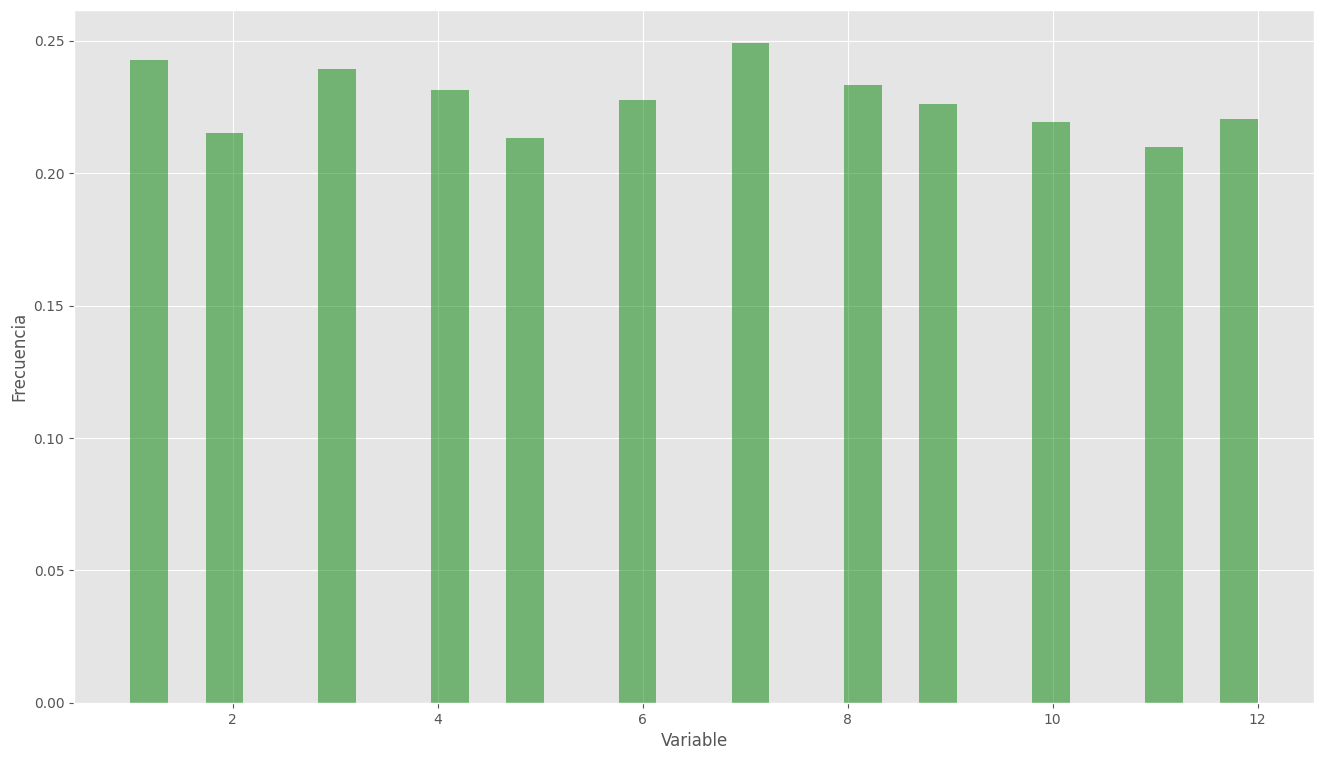

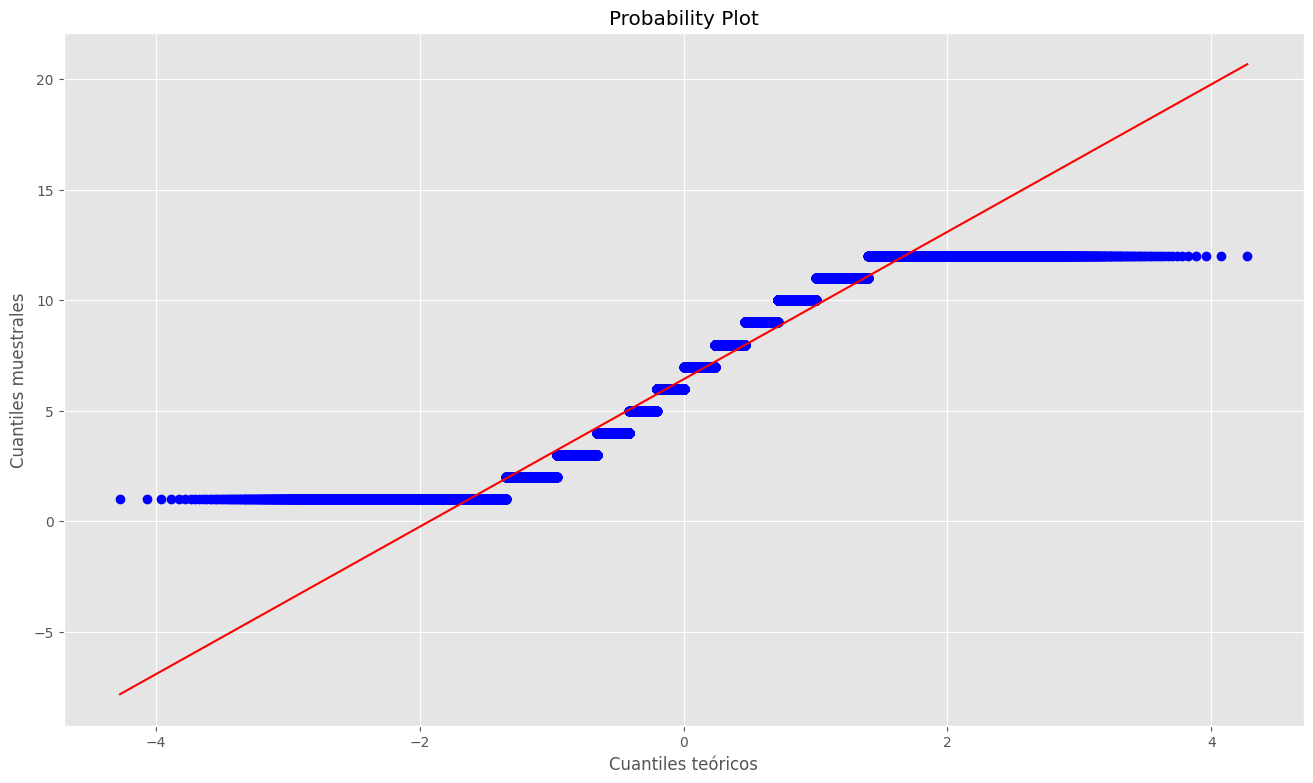

KS Estadístico: 0.8882487942375488
Valor-p: 0.0
Estadístico = 60192.499, p-value = 0.000
La variable no sigue una distribución normal


In [6]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd




#Analisis de datos Mesreg

plt.hist(defunciones['Mesreg'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Mesreg'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Mesreg'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Mesreg'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

El resultado obtenido indica que hay evidencia significativa para rechazar la hipótesis nula de que los datos siguen una distribución normal.

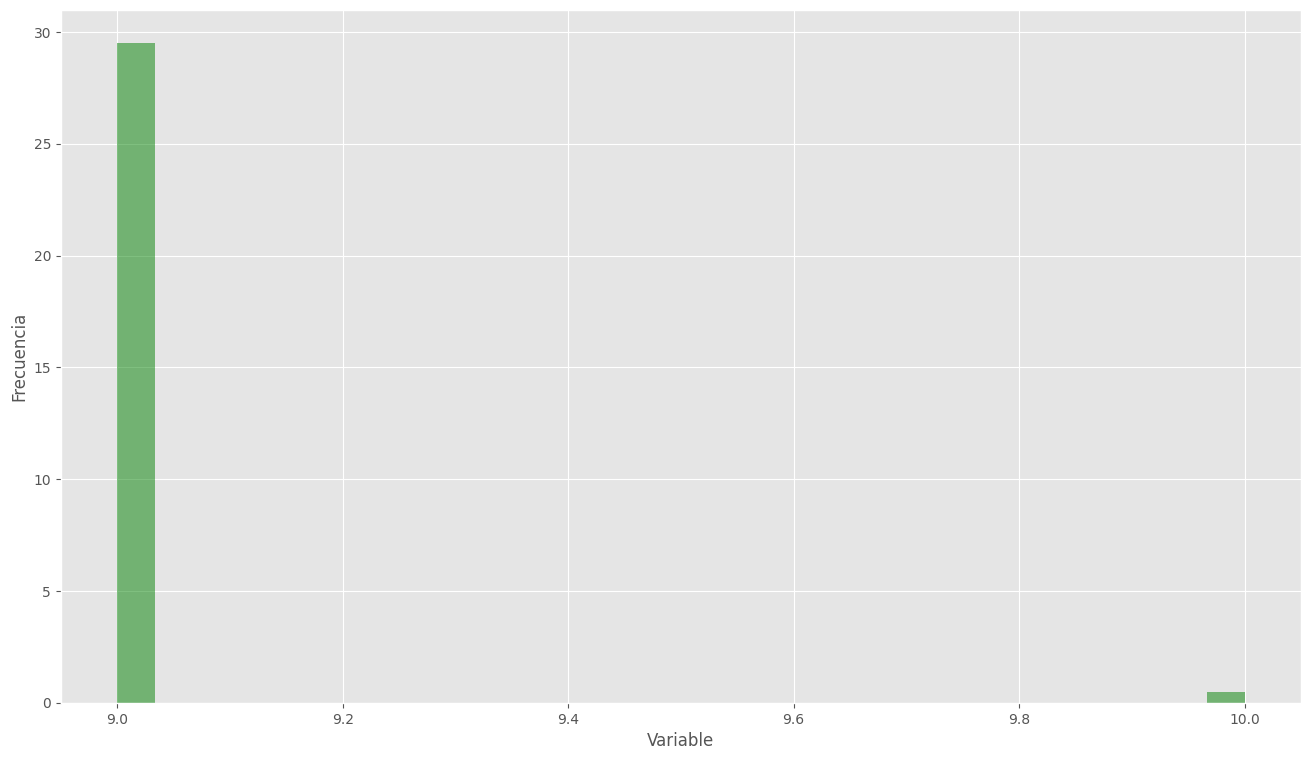

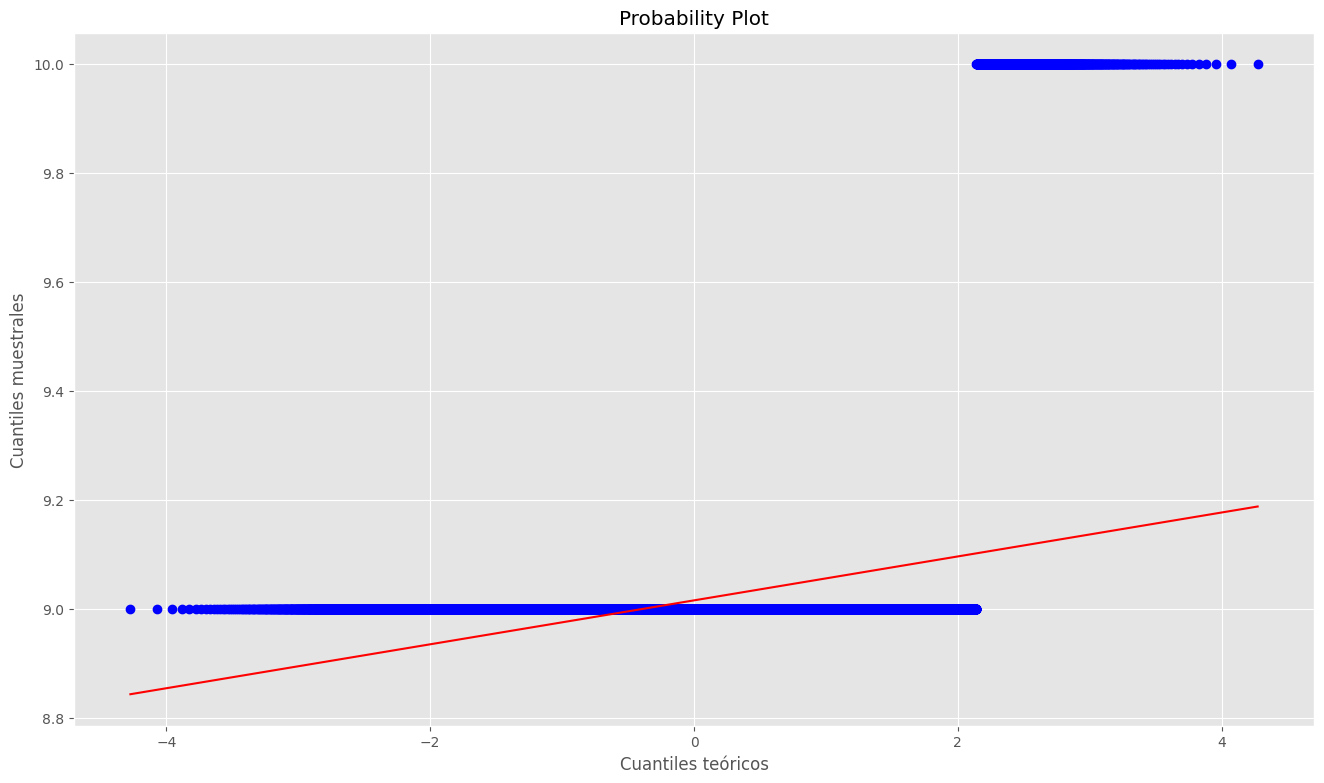

KS Estadístico: 1.0
Valor-p: 0.0
Estadístico = 93321.306, p-value = 0.000
La variable no sigue una distribución normal


In [7]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Añoreg

plt.hist(defunciones['Añoreg'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Añoreg'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Añoreg'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Añoreg'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

El resultado obtenido indica que hay evidencia significativa para rechazar la hipótesis nula de que los datos siguen una distribución normal.

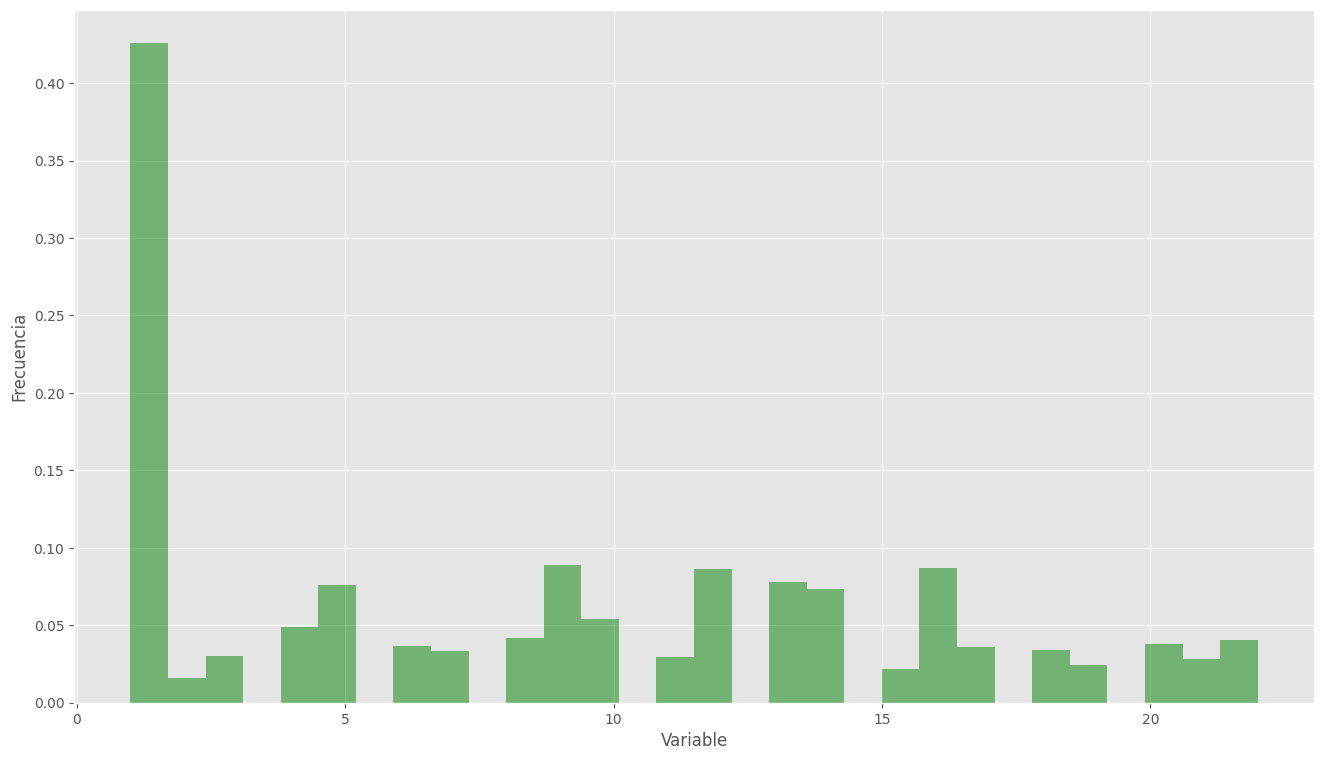

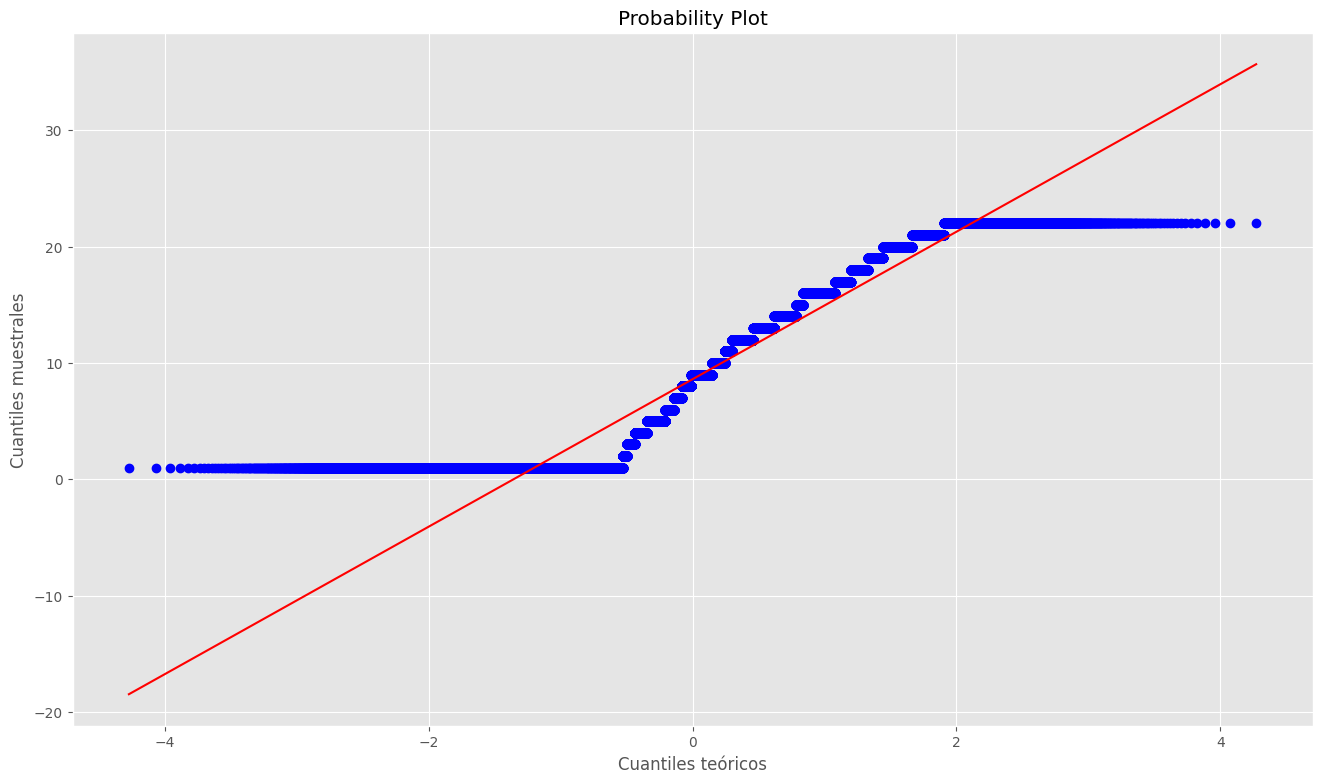

KS Estadístico: 0.8413447460685429
Valor-p: 0.0
Estadístico = 46381.310, p-value = 0.000
La variable no sigue una distribución normal


In [8]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Depocu

plt.hist(defunciones['Depocu'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Depocu'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Depocu'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Depocu'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

El resultado obtenido indica que hay evidencia significativa para rechazar la hipótesis nula de que los datos siguen una distribución normal.

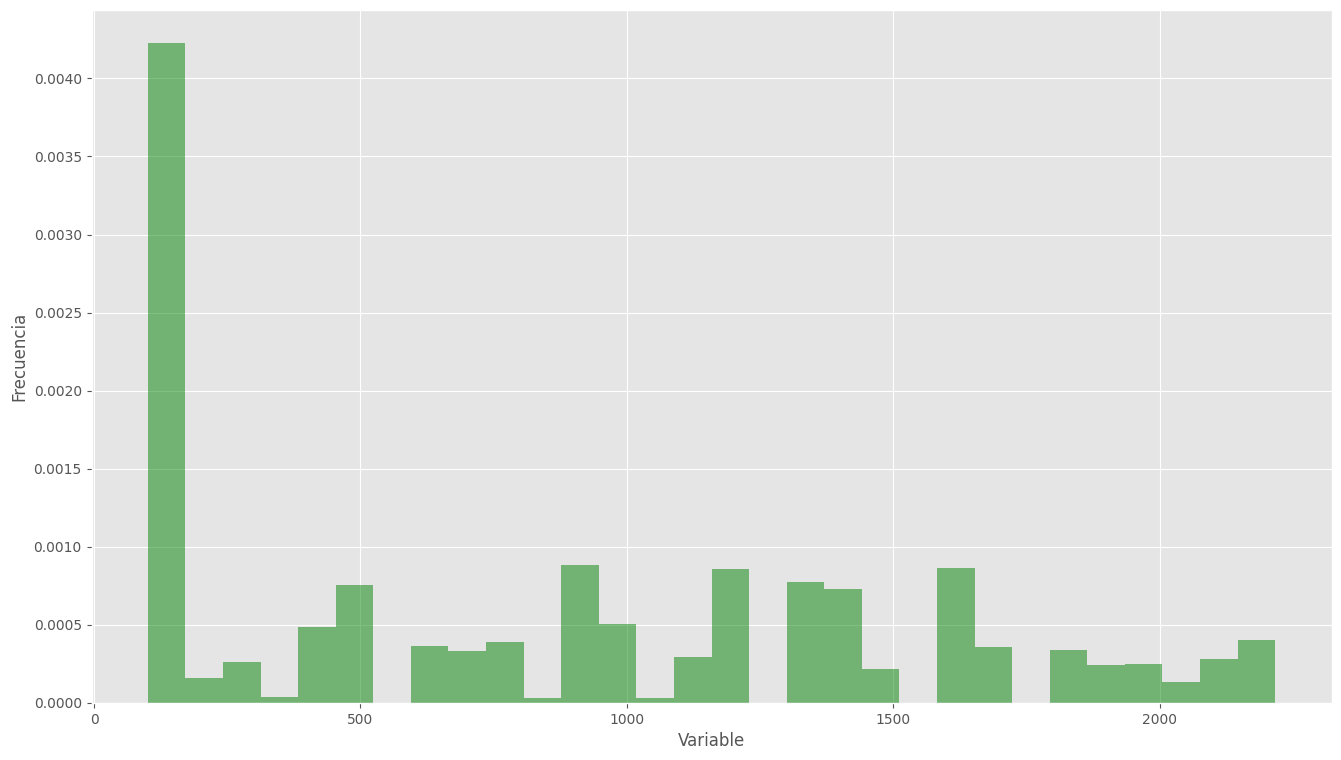

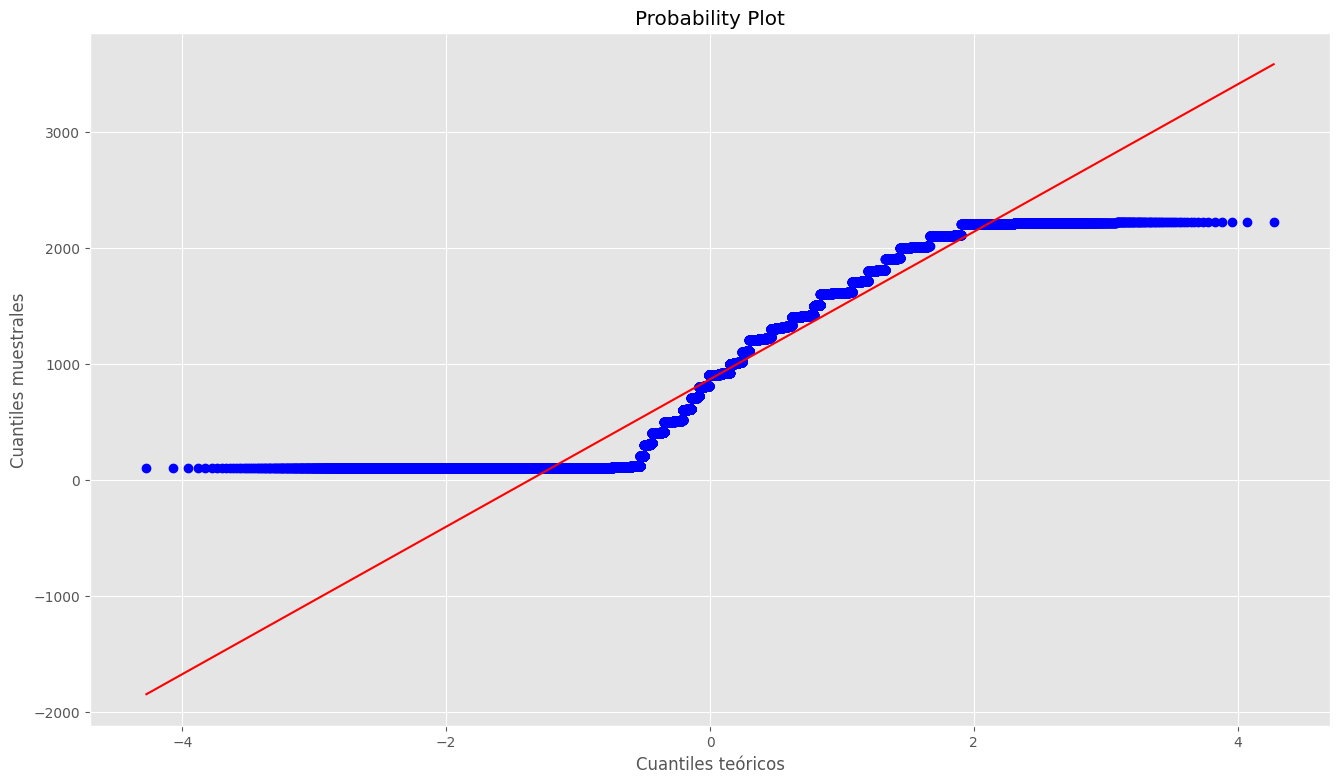

KS Estadístico: 1.0
Valor-p: 0.0
Estadístico = 49908.918, p-value = 0.000
La variable no sigue una distribución normal


In [9]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Mupocu

plt.hist(defunciones['Mupocu'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Mupocu'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Mupocu'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Mupocu'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

El resultado obtenido indica que hay evidencia significativa para rechazar la hipótesis nula de que los datos siguen una distribución normal.

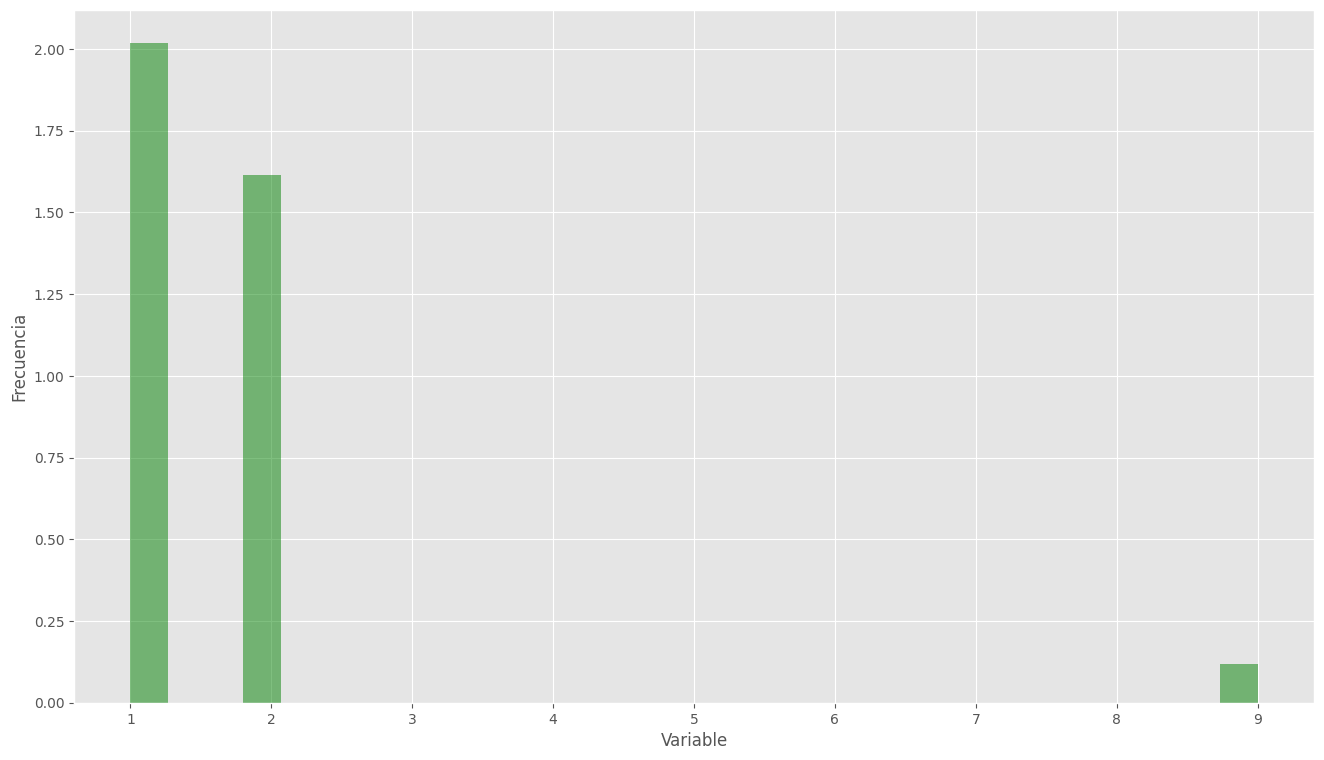

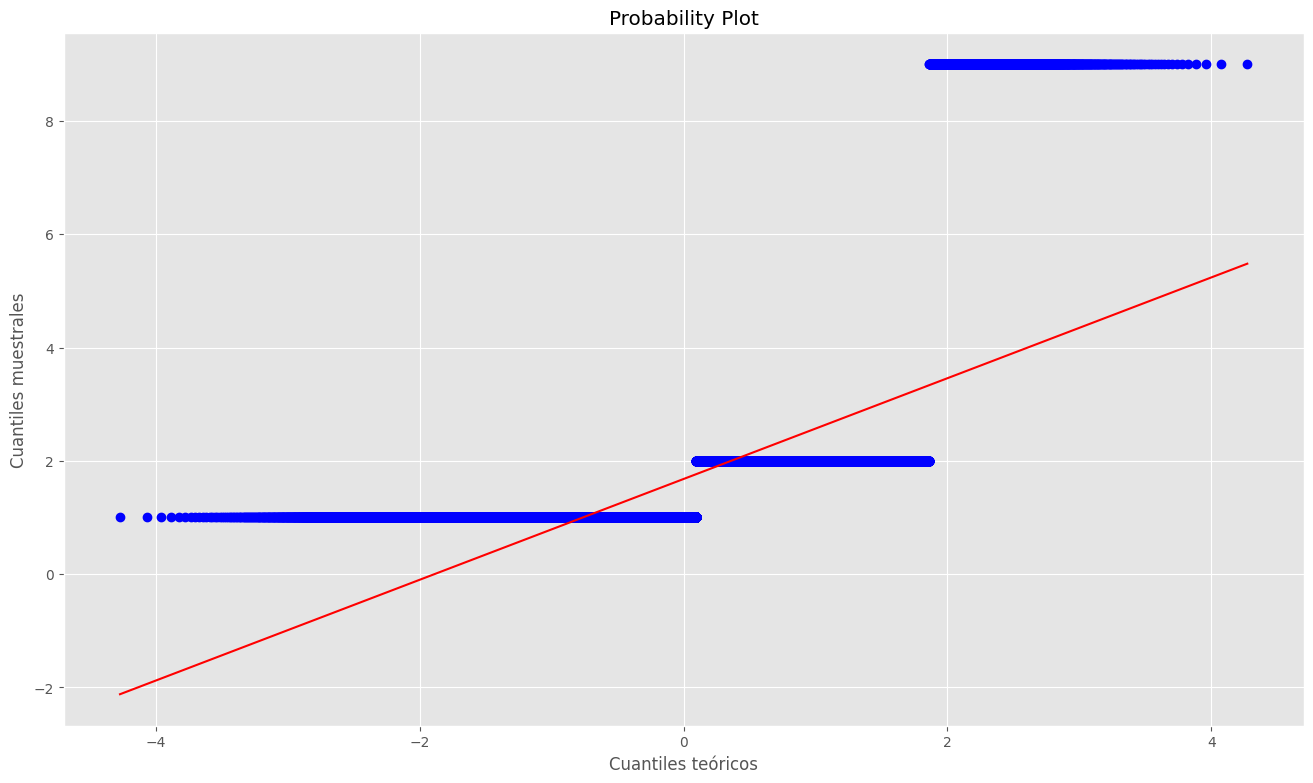

KS Estadístico: 0.8413447460685429
Valor-p: 0.0
Estadístico = 62751.634, p-value = 0.000
La variable no sigue una distribución normal


In [10]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Areag

plt.hist(defunciones['Areag'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Areag'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Areag'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Areag'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

El resultado obtenido indica que hay evidencia significativa para rechazar la hipótesis nula de que los datos siguen una distribución normal.

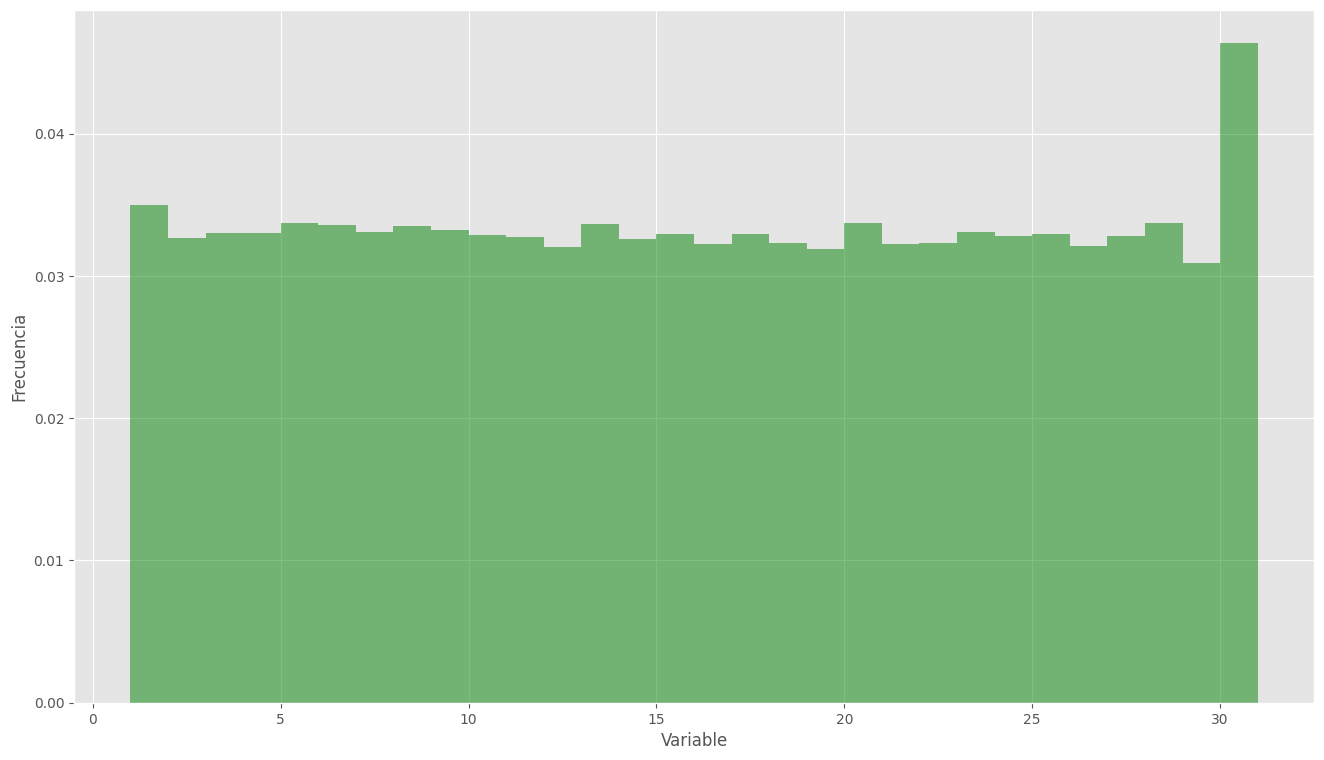

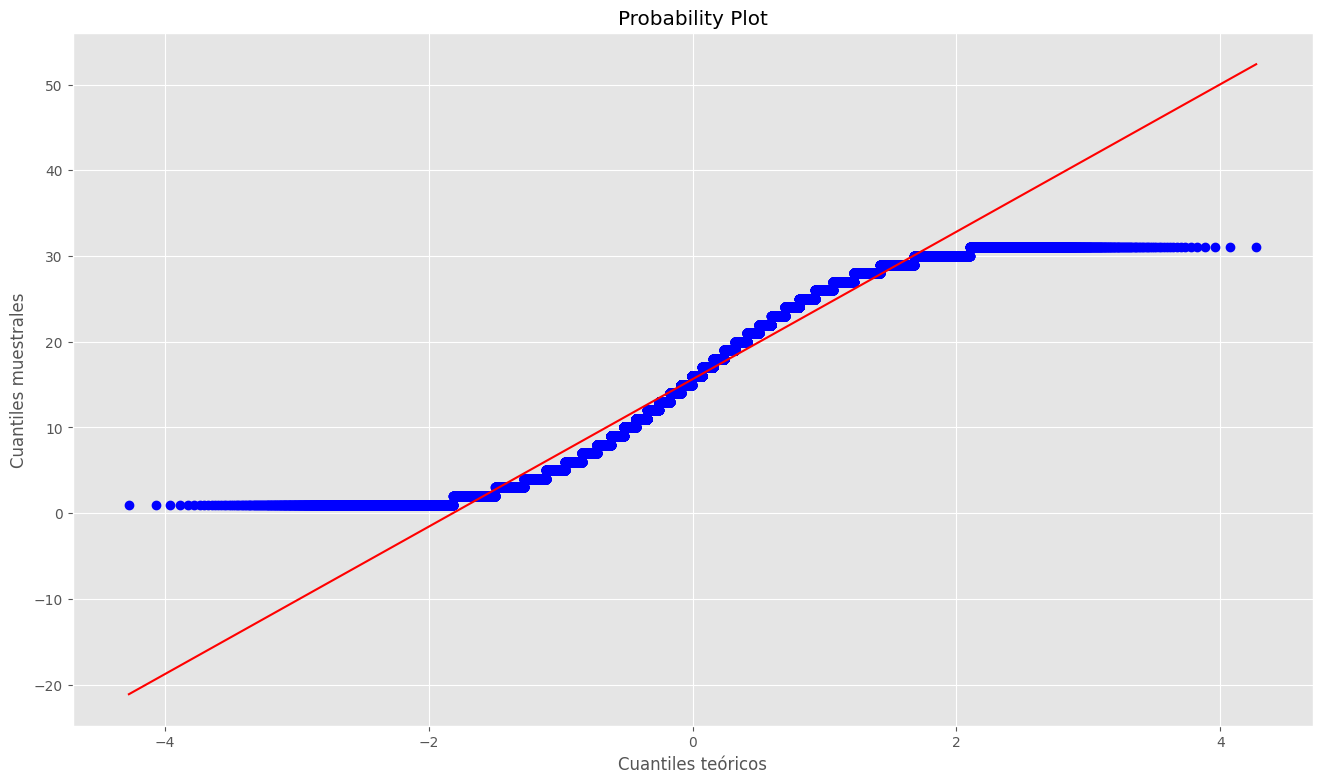

KS Estadístico: 0.9423020944732301
Valor-p: 0.0
Estadístico = 63158.831, p-value = 0.000
La variable no sigue una distribución normal


In [11]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Diaocu

plt.hist(defunciones['Diaocu'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Diaocu'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Diaocu'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Diaocu'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

El resultado obtenido indica que hay evidencia significativa para rechazar la hipótesis nula de que los datos siguen una distribución normal.

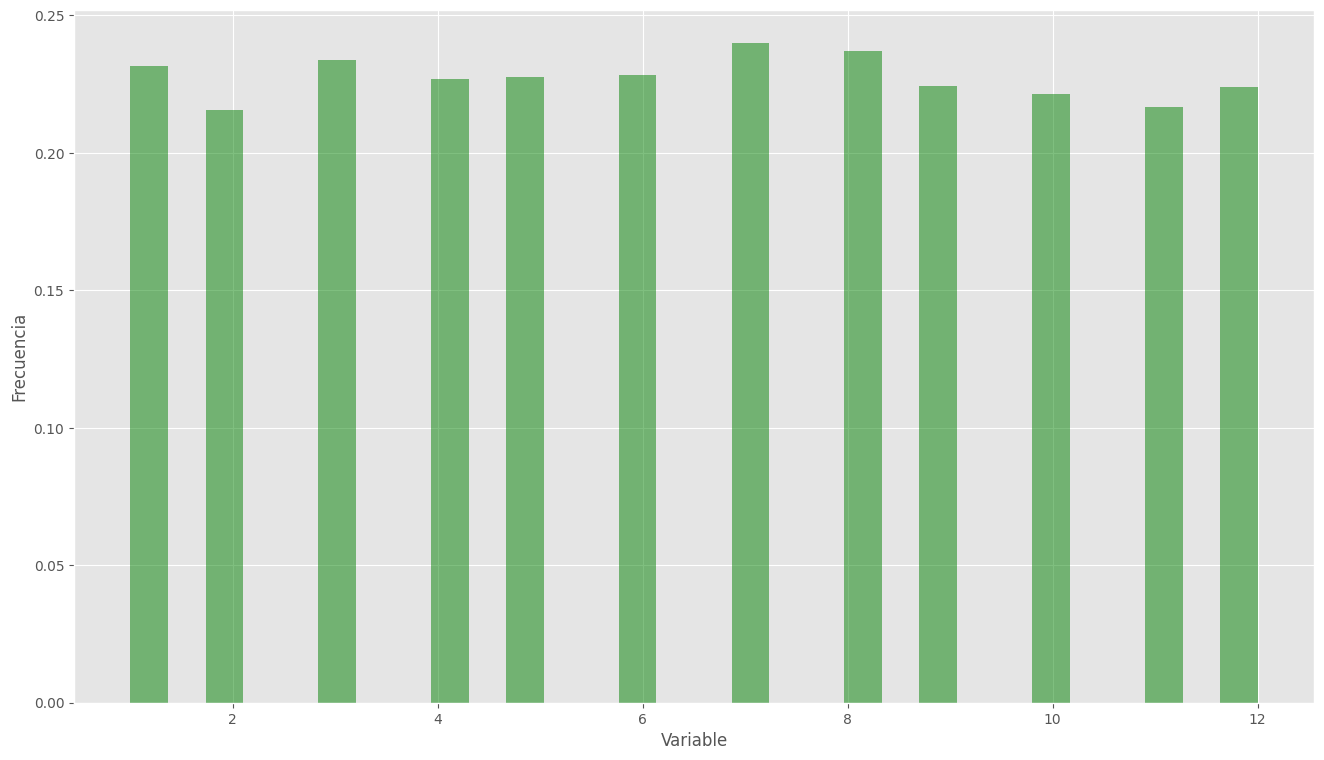

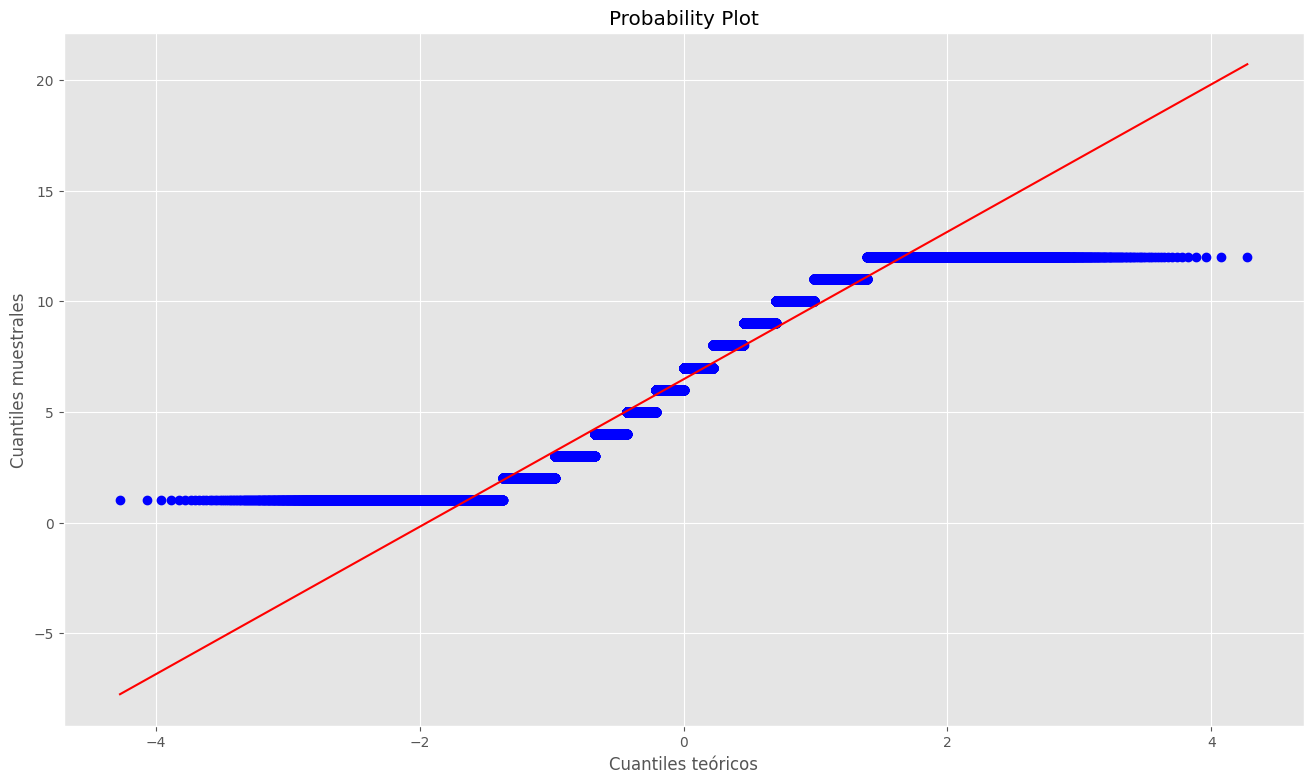

KS Estadístico: 0.8923488123668807
Valor-p: 0.0
Estadístico = 59505.113, p-value = 0.000
La variable no sigue una distribución normal


In [12]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Mesocu

plt.hist(defunciones['Mesocu'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Mesocu'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Mesocu'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Mesocu'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

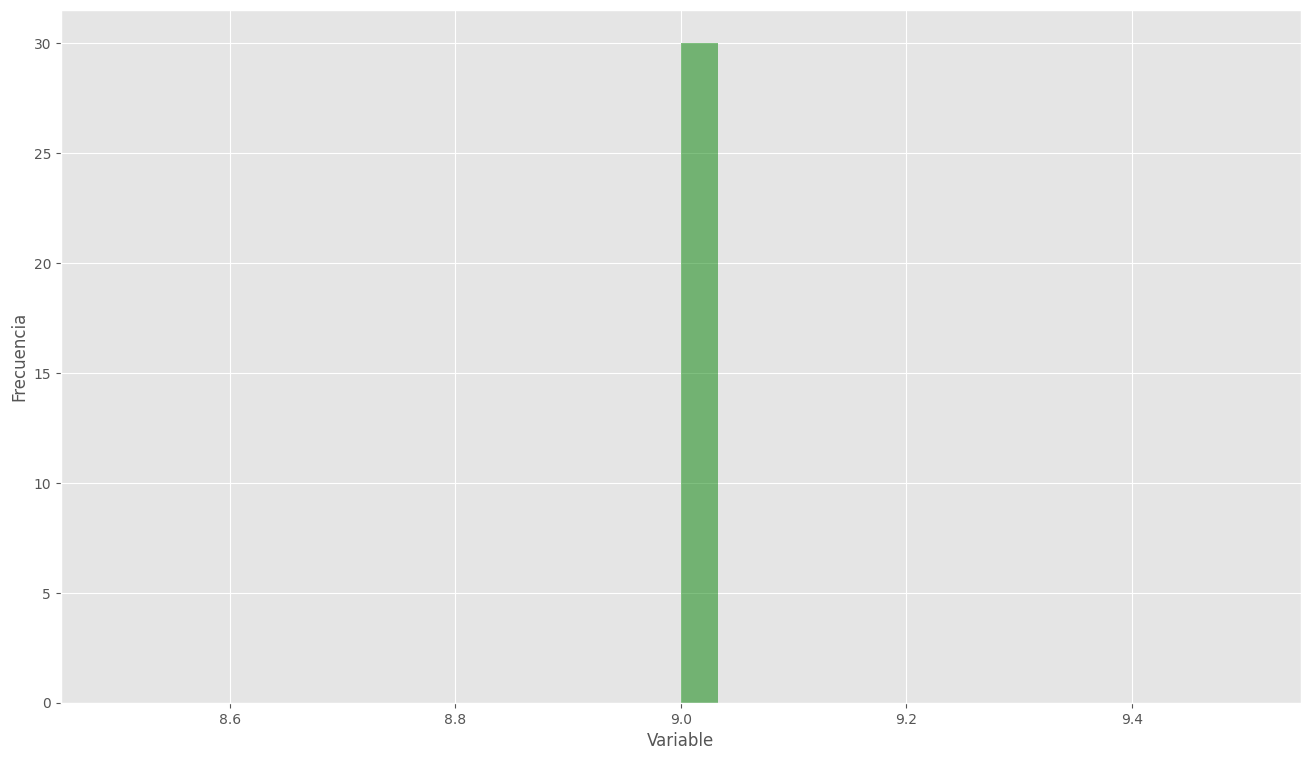

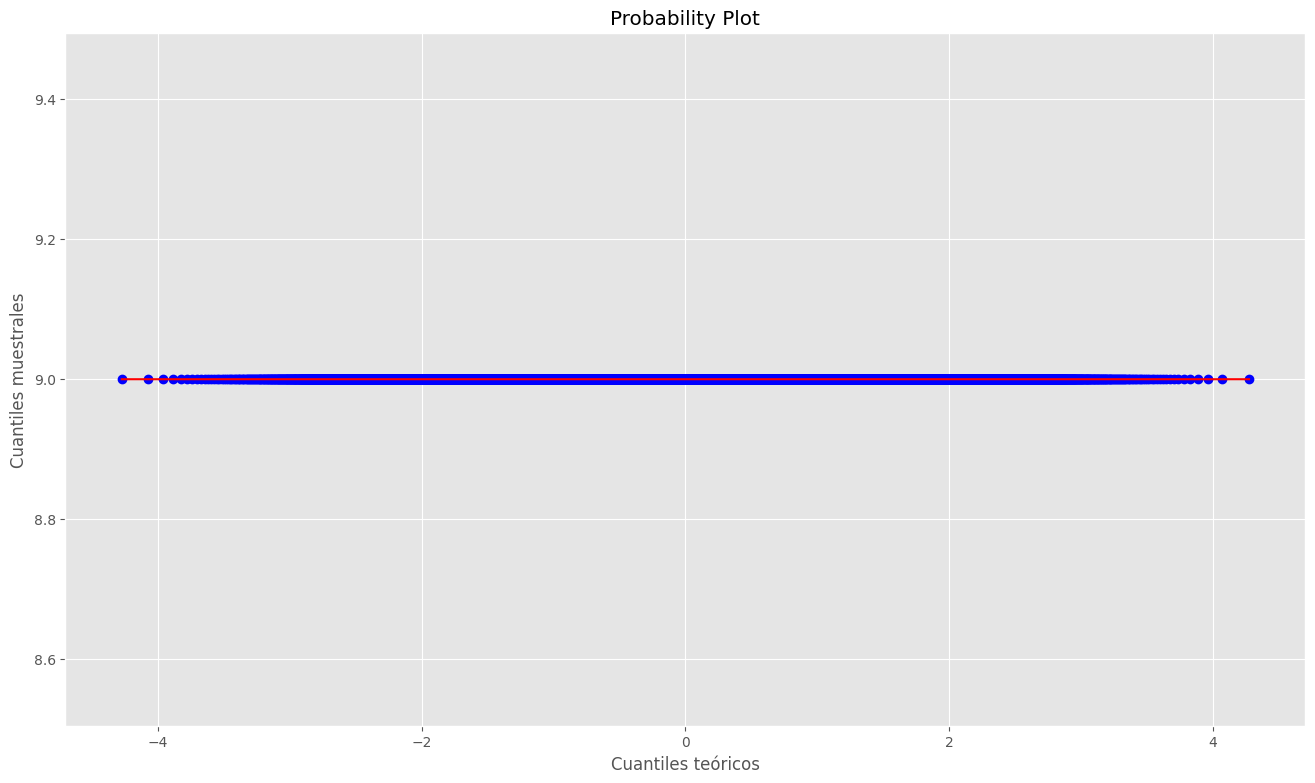

KS Estadístico: 1.0
Valor-p: 0.0
Estadístico = 177981.732, p-value = 0.000
La variable no sigue una distribución normal


In [13]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Añoocu

plt.hist(defunciones['Añoocu'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Añoocu'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Añoocu'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Añoocu'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

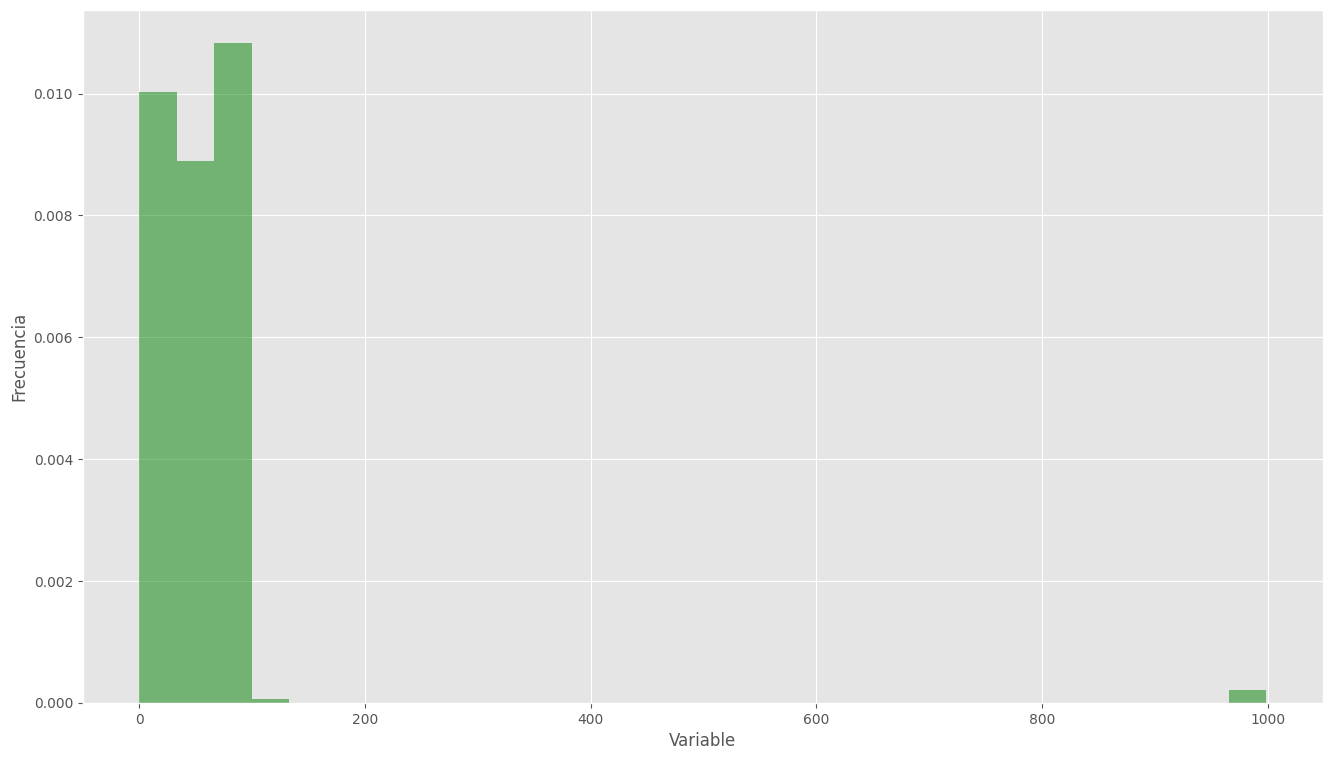

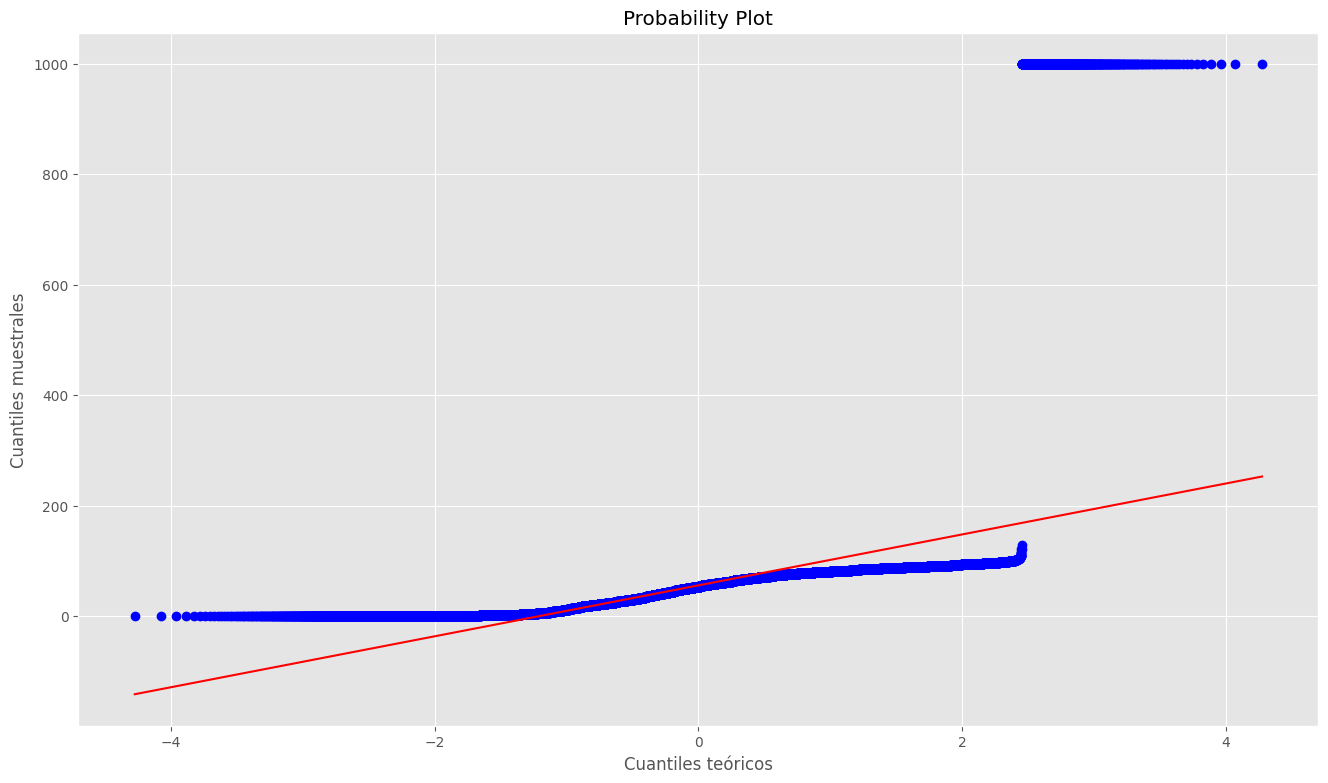

KS Estadístico: 0.9282867263780651
Valor-p: 0.0
Estadístico = 108310.639, p-value = 0.000
La variable no sigue una distribución normal


In [14]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Edadif

plt.hist(defunciones['Edadif'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Edadif'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Edadif'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Edadif'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

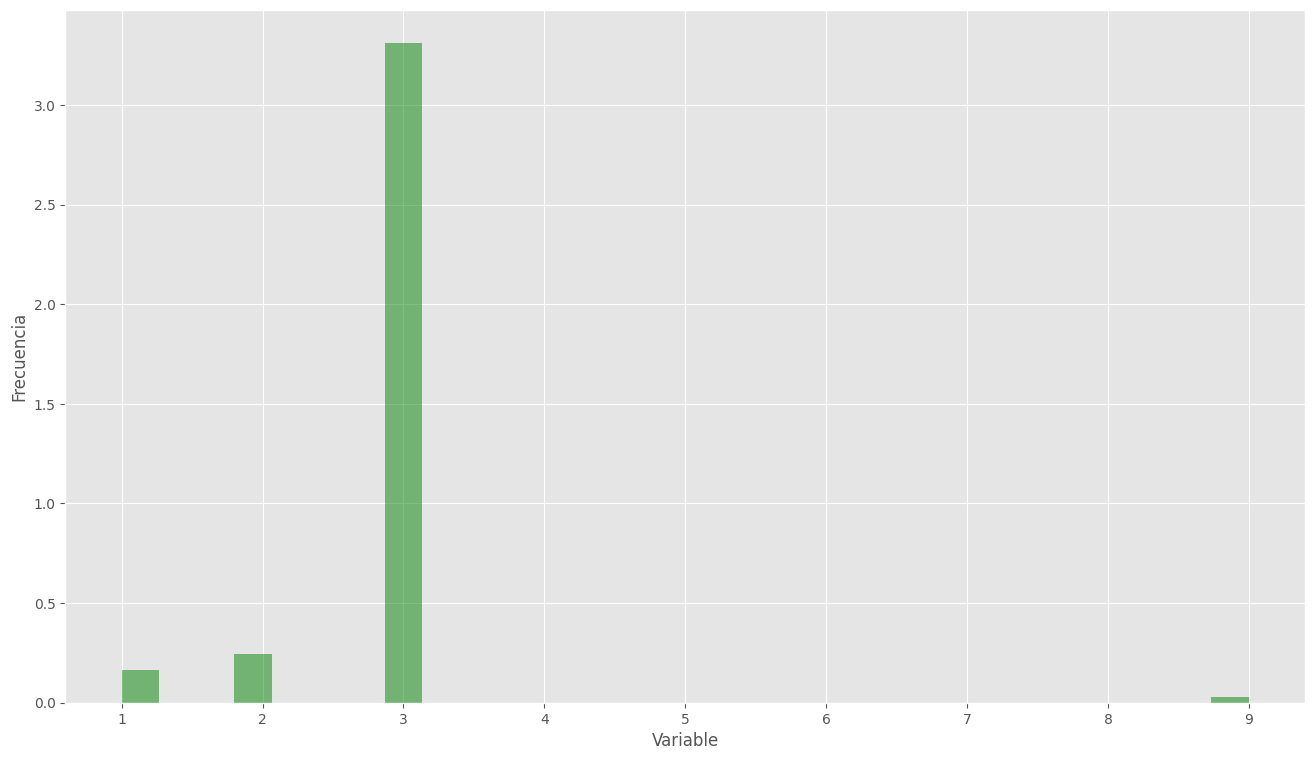

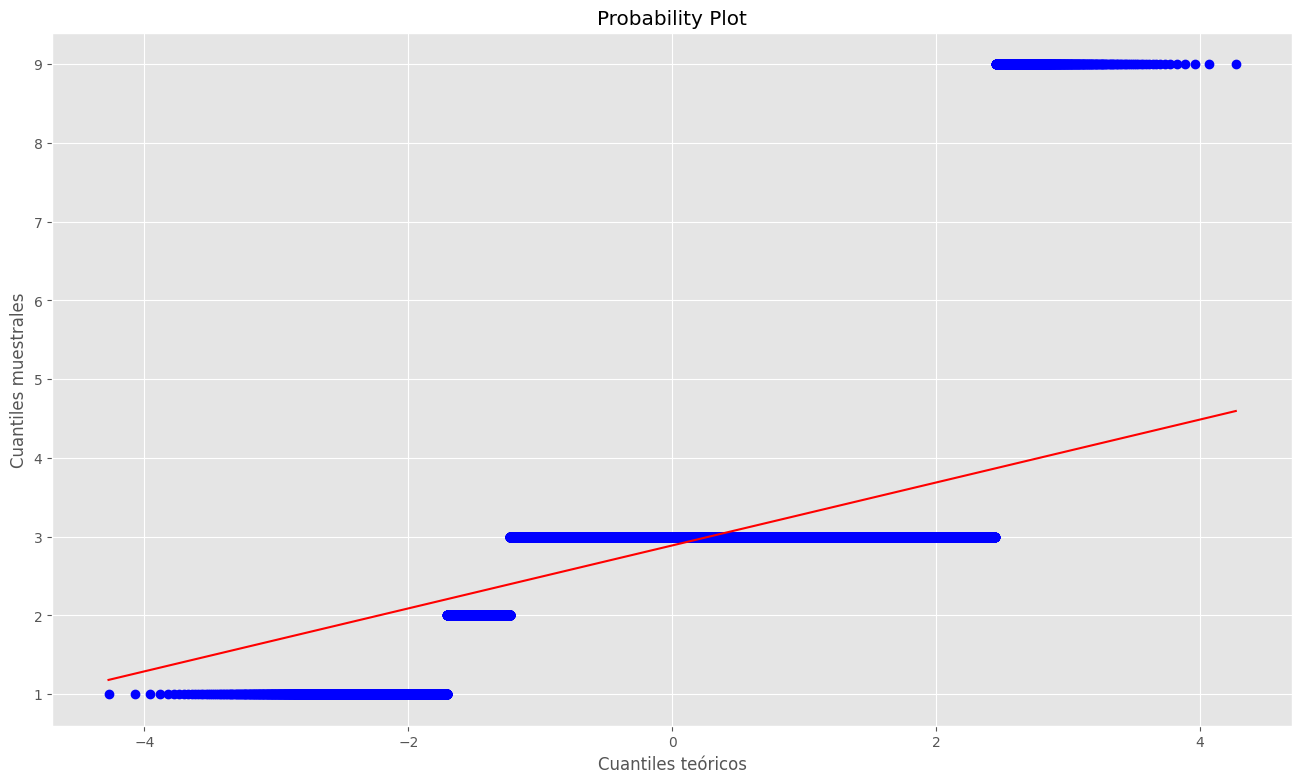

KS Estadístico: 0.9330700808622856
Valor-p: 0.0
Estadístico = 62432.989, p-value = 0.000
La variable no sigue una distribución normal


In [15]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Perdif

plt.hist(defunciones['Perdif'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Perdif'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Perdif'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Perdif'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

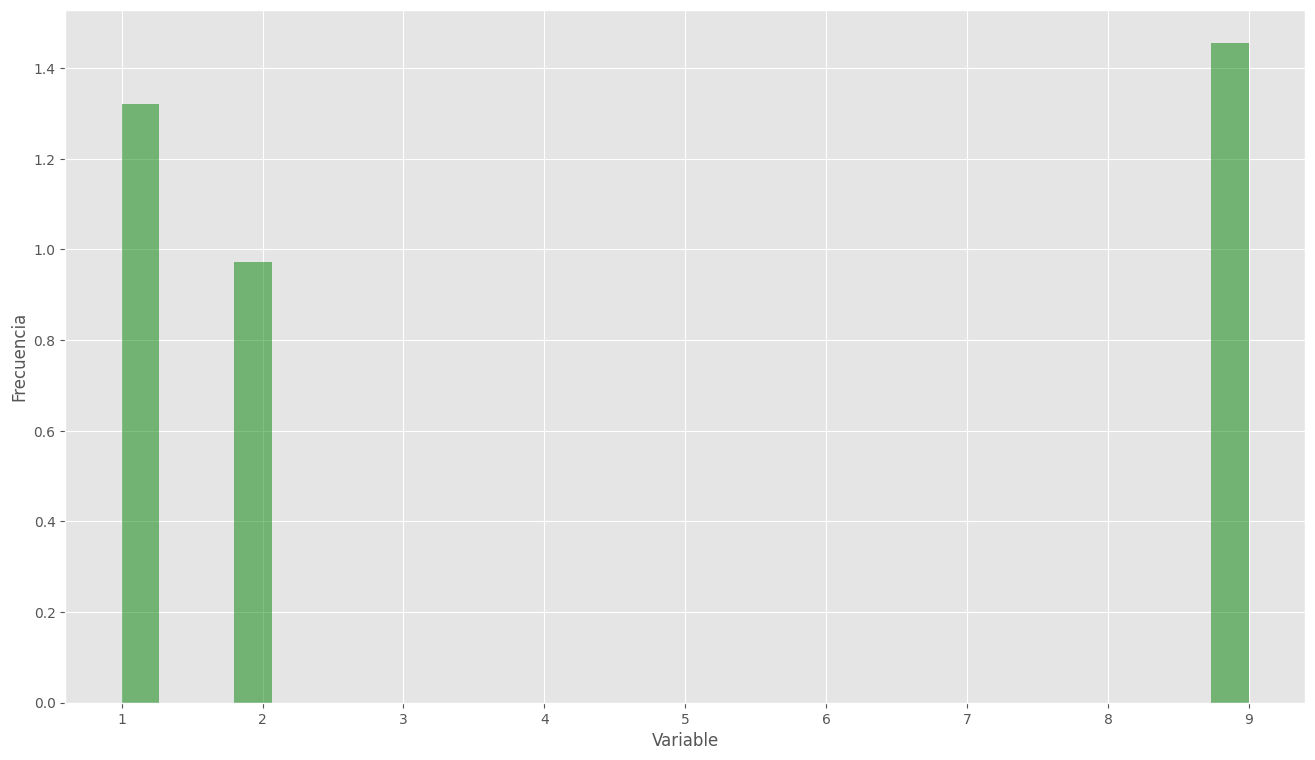

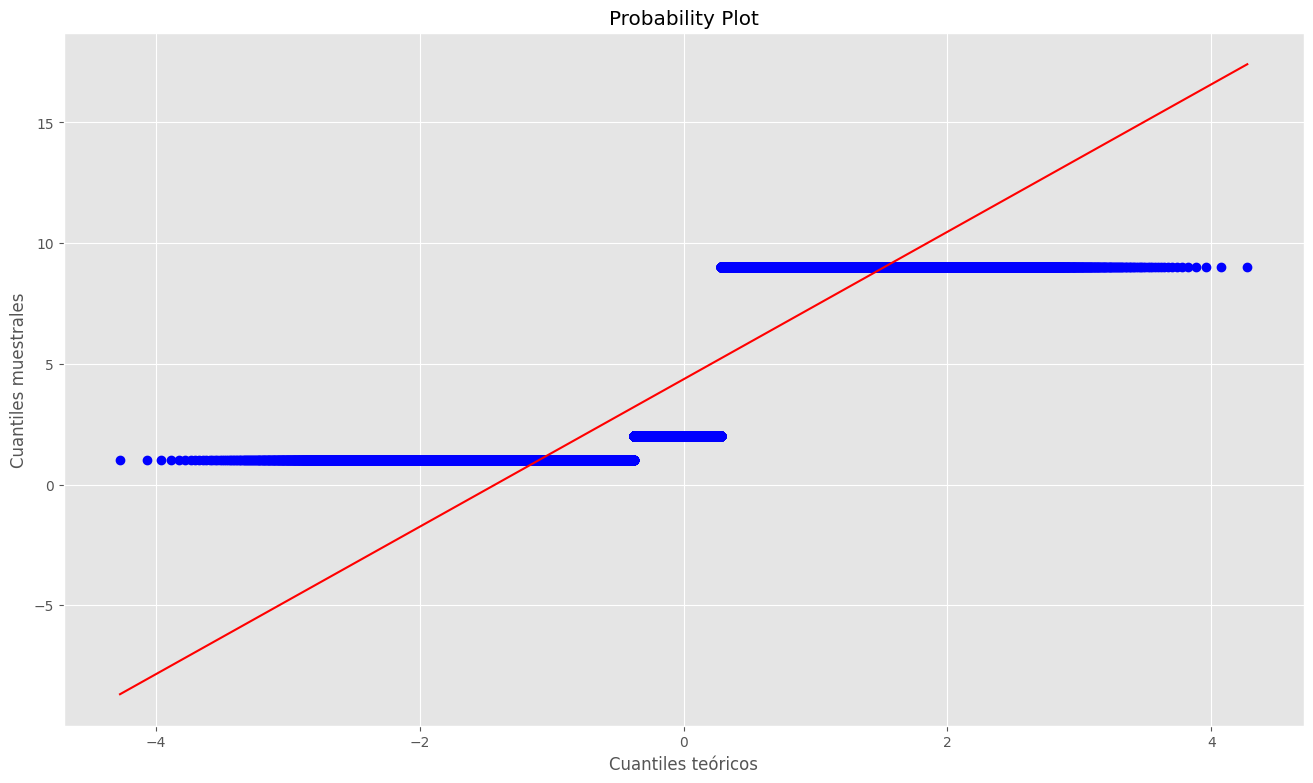

KS Estadístico: 0.8413447460685429
Valor-p: 0.0
Estadístico = 287948.742, p-value = 0.000
La variable no sigue una distribución normal


In [16]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Getdif

plt.hist(defunciones['Getdif'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Getdif'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Getdif'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Getdif'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

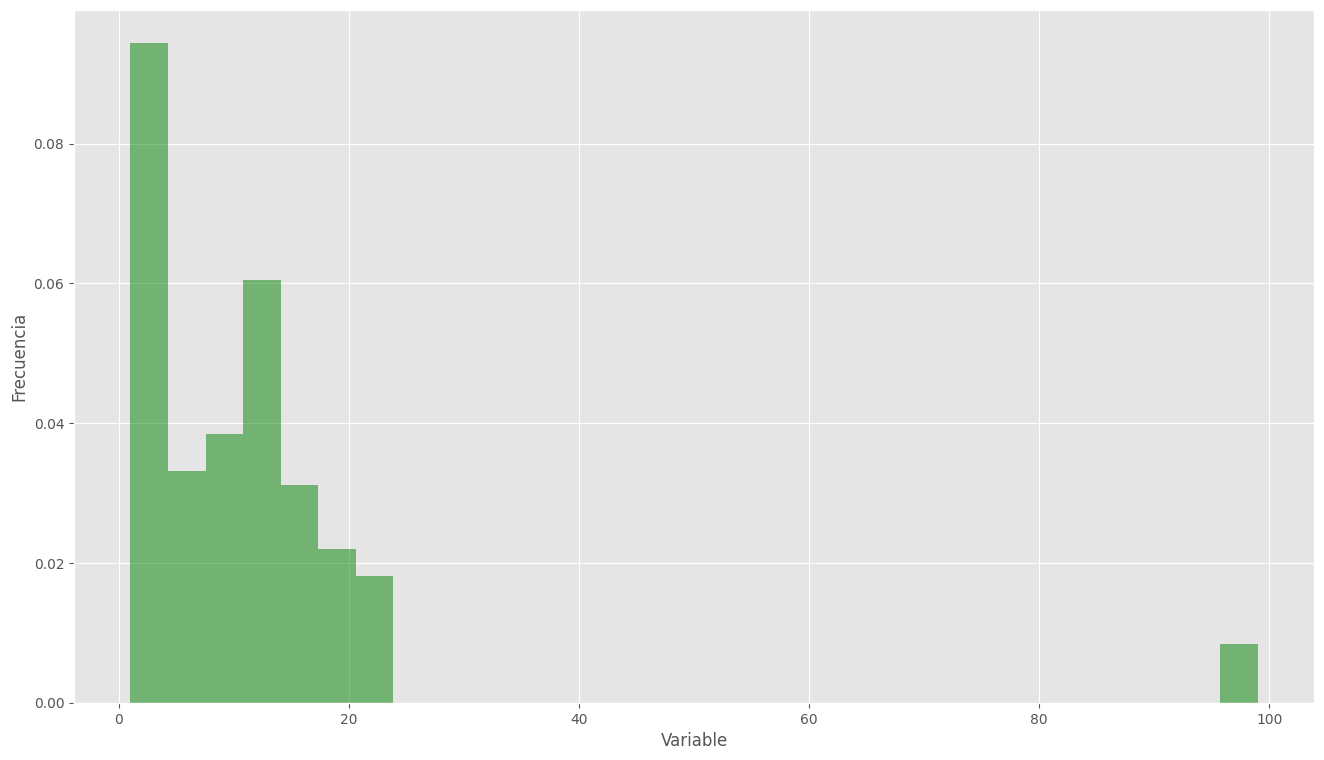

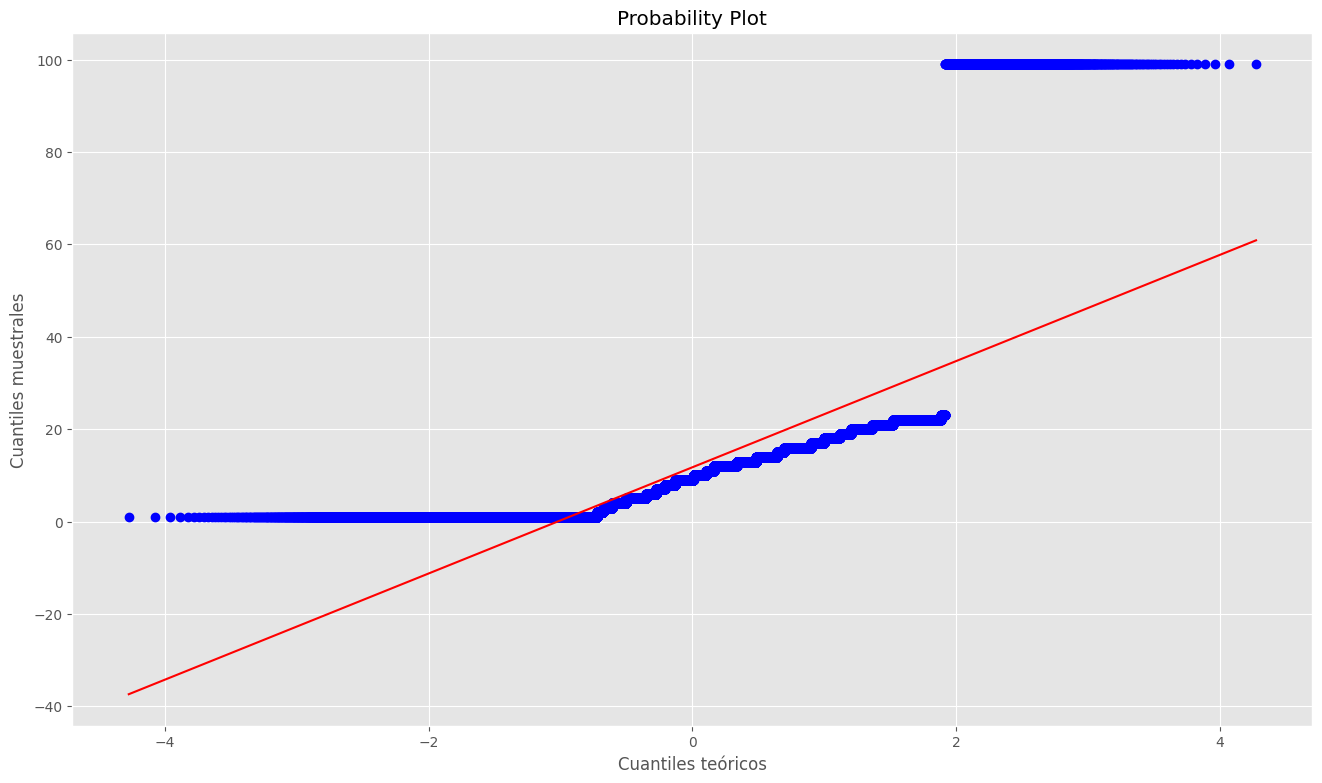

KS Estadístico: 0.8413447460685429
Valor-p: 0.0
Estadístico = 62395.168, p-value = 0.000
La variable no sigue una distribución normal


In [17]:
#importamos librerías 

import numpy as np
from scipy.stats import norm, probplot, kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pandas as pd


#Analisis de datos Dredif

plt.hist(defunciones['Dredif'], bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()

# QQ-Plot
probplot(defunciones['Dredif'], dist=norm, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.show()

# Test de Lilliefors
ks_stat, p_val = kstest(defunciones['Dredif'], 'norm')
print('KS Estadístico:', ks_stat)
print('Valor-p:', p_val)

# analizar la variable Edadif
stat, p = normaltest(defunciones['Dredif'])

# imprimir los resultados
print('Estadístico = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('La variable sigue una distribución normal')
else:
    print('La variable no sigue una distribución normal')

1.b. Tablas de frecuencia par variables categóricas:

col_0  count
Sexo        
1      41354
2      30353


<AxesSubplot:xlabel='Sexo'>

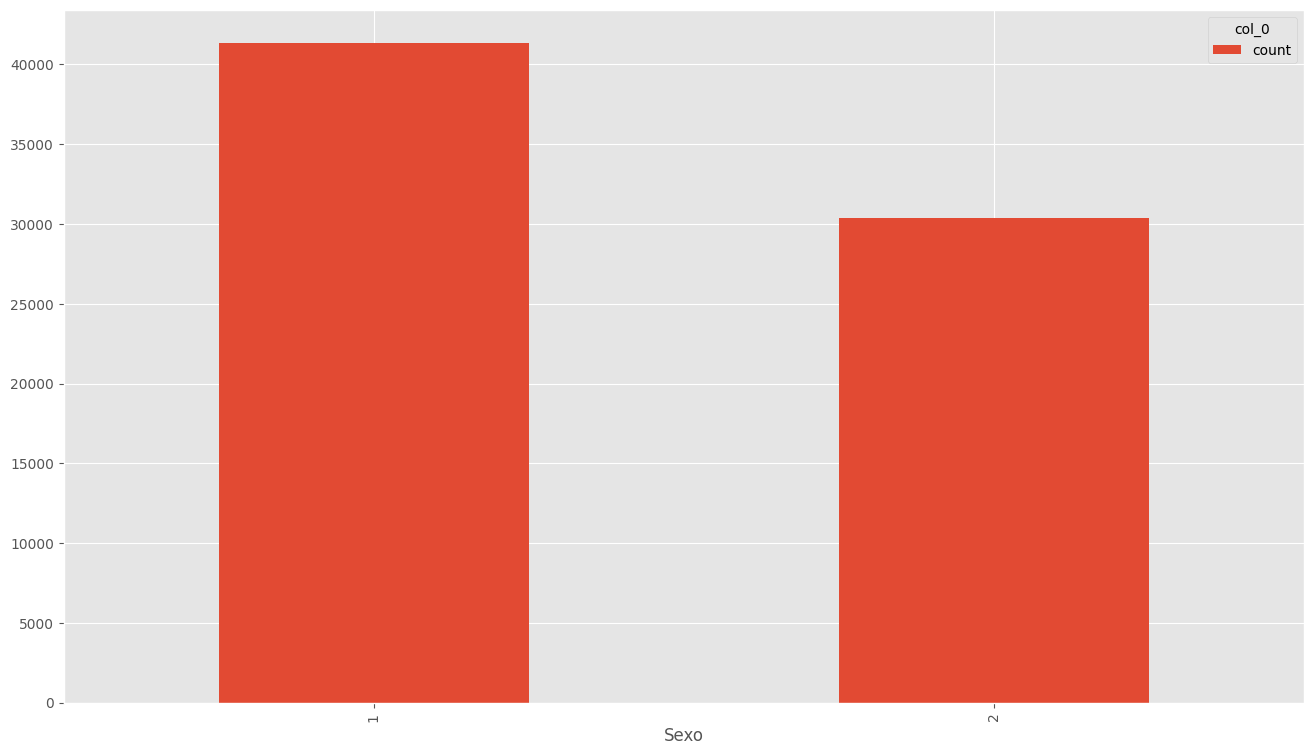

In [18]:
# crear la tabla de frecuencia para la variable "Sexo"
tabla_frecuencia = pd.crosstab(index=defunciones["Sexo"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

1 : Maculino (41354)

2 : Femenino (30353)

col_0   count
Ecidif       
1       42692
2       25833
3         603
9        2579


<AxesSubplot:xlabel='Ecidif'>

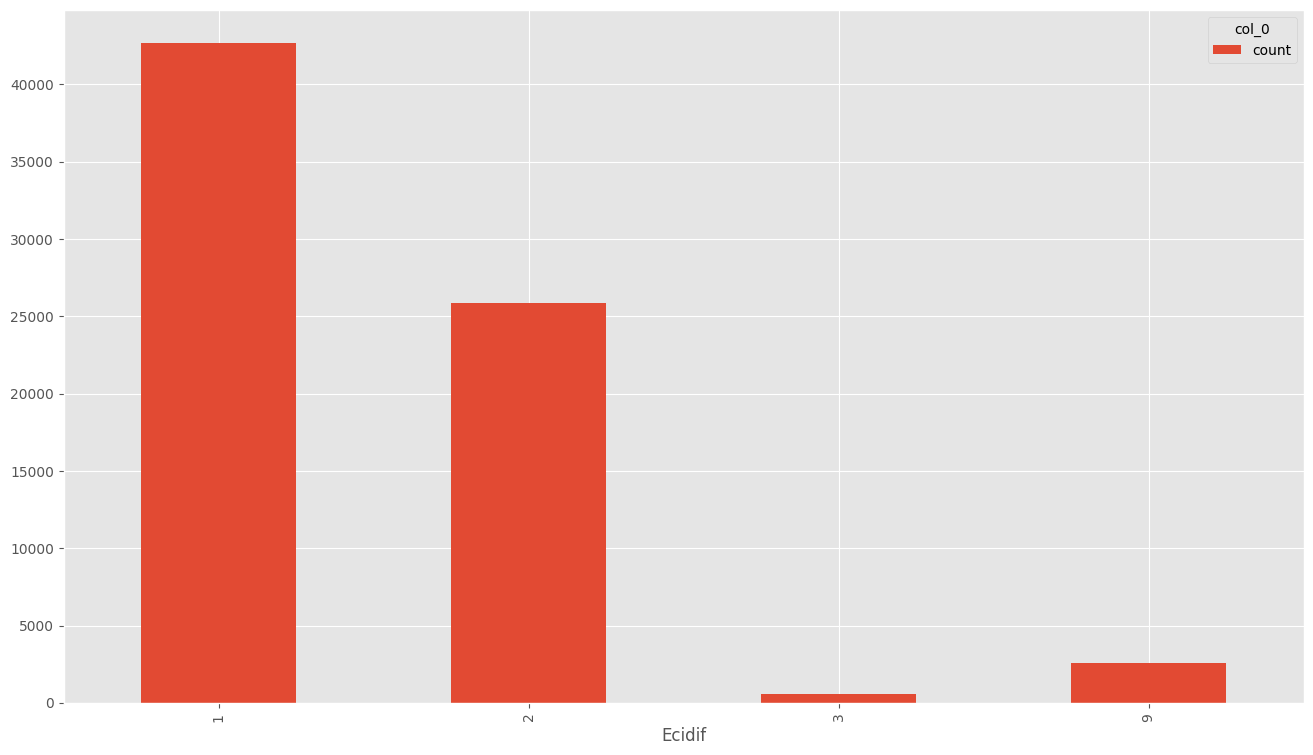

In [19]:
# crear la tabla de frecuencia para la variable "Ecidif"
tabla_frecuencia = pd.crosstab(index=defunciones["Ecidif"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

En la CIE-10, los códigos de causa de muerte que mencionas significan lo siguiente:

1: Enfermedades infecciosas y parasitarias

2: Neoplasias (tumores)

3: Enfermedades de sangre, sistema inmunológico y trastornos de la nutrición

9: Causas externas de mortalidad (tales como accidentes, suicidios, homicidios, entre otros)


col_0   count
Ocudif       
110         5
310        16
1111        1
1120        1
1219        8
...       ...
9712     5455
9713      139
9714    11829
9998      262
9999     3621

[200 rows x 1 columns]


<AxesSubplot:xlabel='Ocudif'>

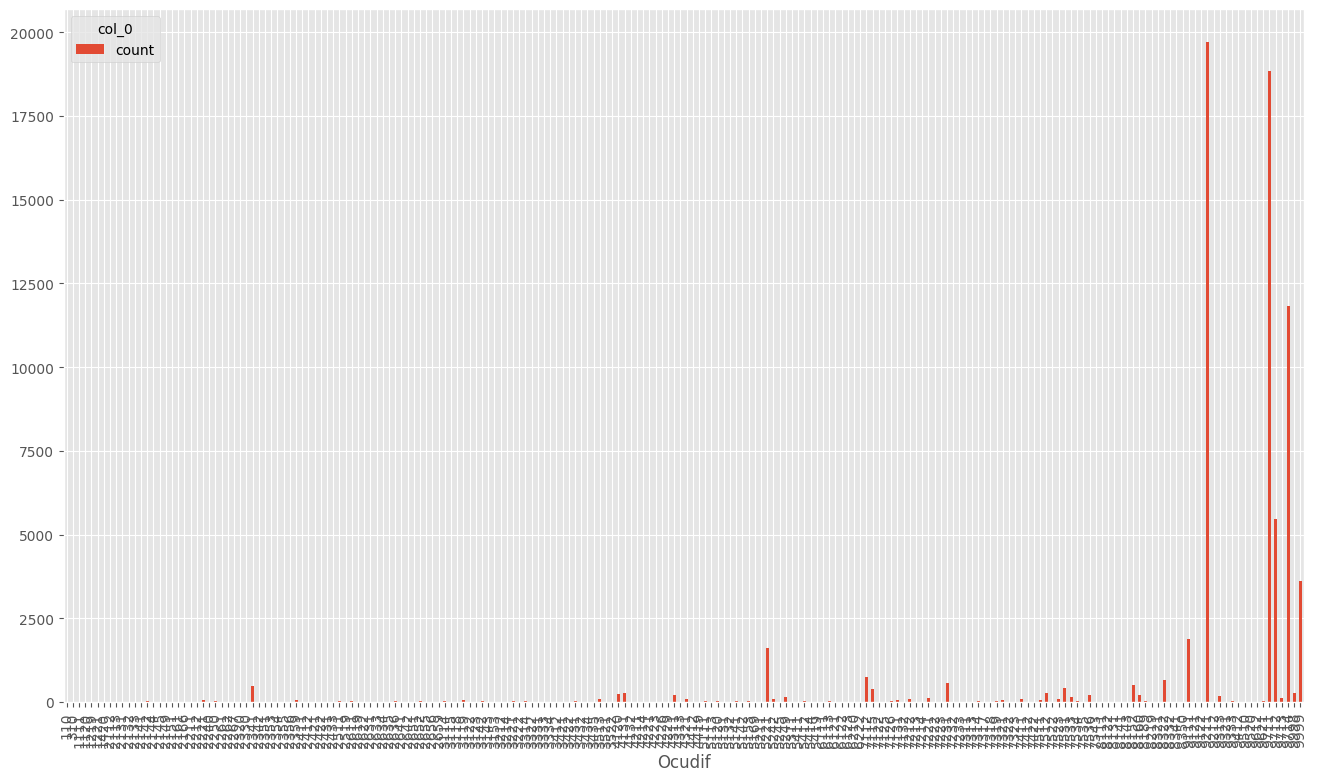

In [20]:
# crear la tabla de frecuencia para la variable "Ocudif"
tabla_frecuencia = pd.crosstab(index=defunciones["Ocudif"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

110: Gerentes y administradores de servicios de alimentación y hospedaje

310: Profesionales de la salud relacionados con la tecnología de diagnóstico y tratamiento

1111: Directores de servicios financieros y contables

1120: Directores de servicios administrativos y de apoyo

9712: Trabajadores de los servicios de limpieza y mantenimiento de edificios

9713: Trabajadores de servicios de cuidado personal y a domicilio

9714: Trabajadores de servicios de protección y seguridad

9998: Trabajadores no clasificados bajo otras categorías ocupacionales

9999: Trabajadores no clasificados según su tipo de actividad o función laboral.

col_0   count
Dnadif       
1       16176
2        1017
3        1464
4        2495
5        3834
6        2024
7        1597
8        1993
9        3658
10       2656
11       1572
12       4405
13       3544
14       3462
15       1156
16       3693
17       1737
18       1786
19       1244
20       1906
21       1565
22       2398
23        784
99       5541


<AxesSubplot:xlabel='Dnadif'>

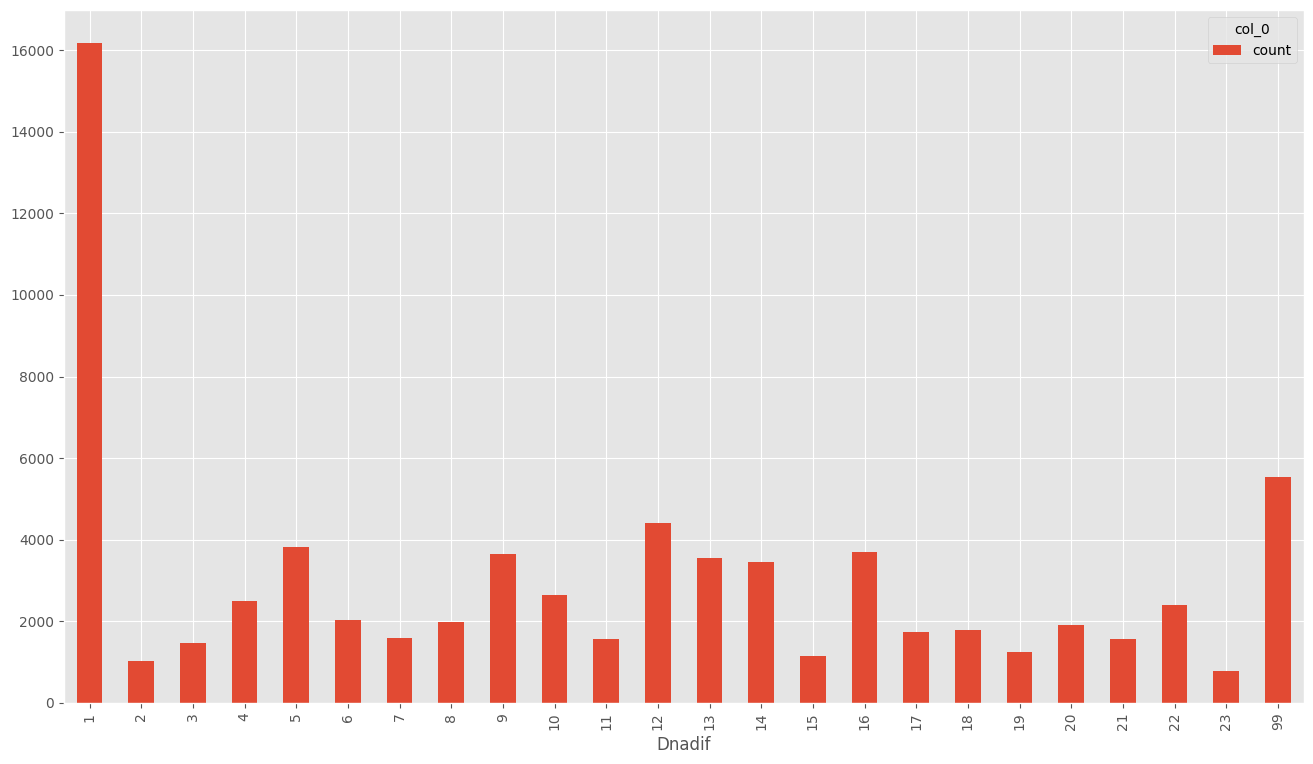

In [21]:
# crear la tabla de frecuencia para la variable "Dnadif"
tabla_frecuencia = pd.crosstab(index=defunciones["Dnadif"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)
tabla_frecuencia.plot.bar()

col_0   count
Mnadif       
101      8735
102       326
103       300
104        38
105       250
...       ...
2215       60
2216       71
2217       99
2300      784
9999     5858

[335 rows x 1 columns]


<AxesSubplot:xlabel='Mnadif'>

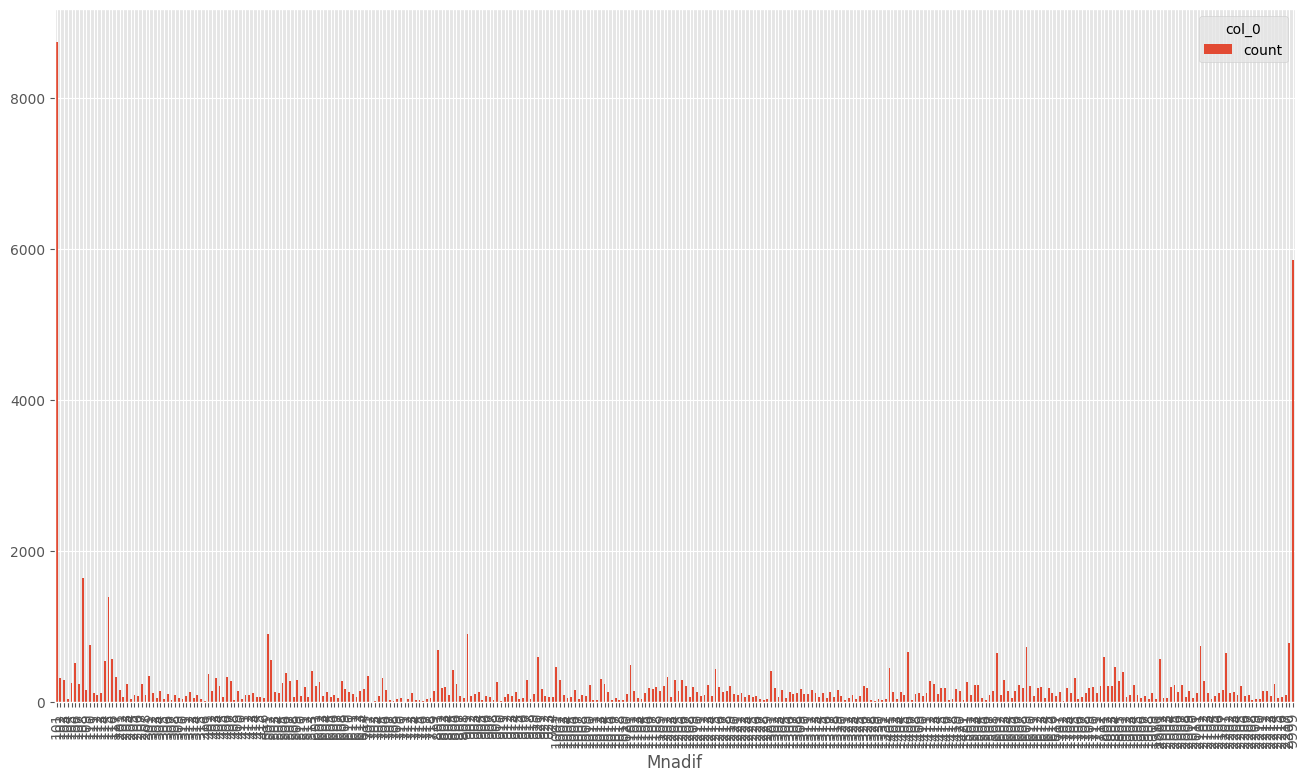

In [22]:
# crear la tabla de frecuencia para la variable "Mnadif"
tabla_frecuencia = pd.crosstab(index=defunciones["Mnadif"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

col_0   count
Nacdif       
0       70452
30          3
31         52
32         60
34         19
35         12
36        260
37        138
38         81
39          2
40         12
42          1
44          3
45          2
50          7
53         17
54          2
57          7
58          4
59          1
60         13
61         19
62          7
64          2
65          9
67          1
68          3
69         11
71         14
72          1
74          1
78          1
79         14
81          3
99        473


<AxesSubplot:xlabel='Nacdif'>

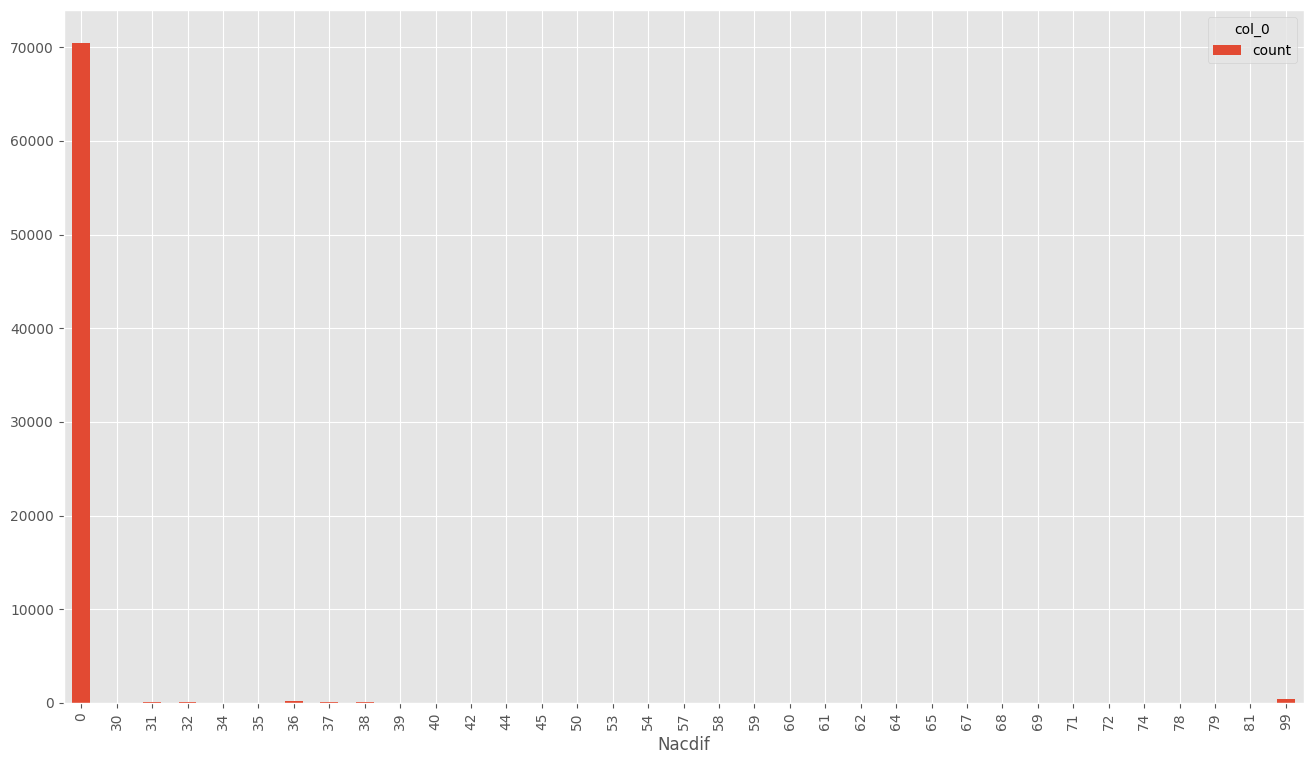

In [23]:
# crear la tabla de frecuencia para la variable "Nacdif"
tabla_frecuencia = pd.crosstab(index=defunciones["Nacdif"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

col_0   count
Caudef       
A009        1
A010       30
A014        2
A039        2
A047        1
...       ...
Y838        3
Y849        1
Y86X        1
Y883        8
k           1

[1662 rows x 1 columns]
La frecuencia de los códigos B20-B24 es: 628


<AxesSubplot:xlabel='Caudef'>

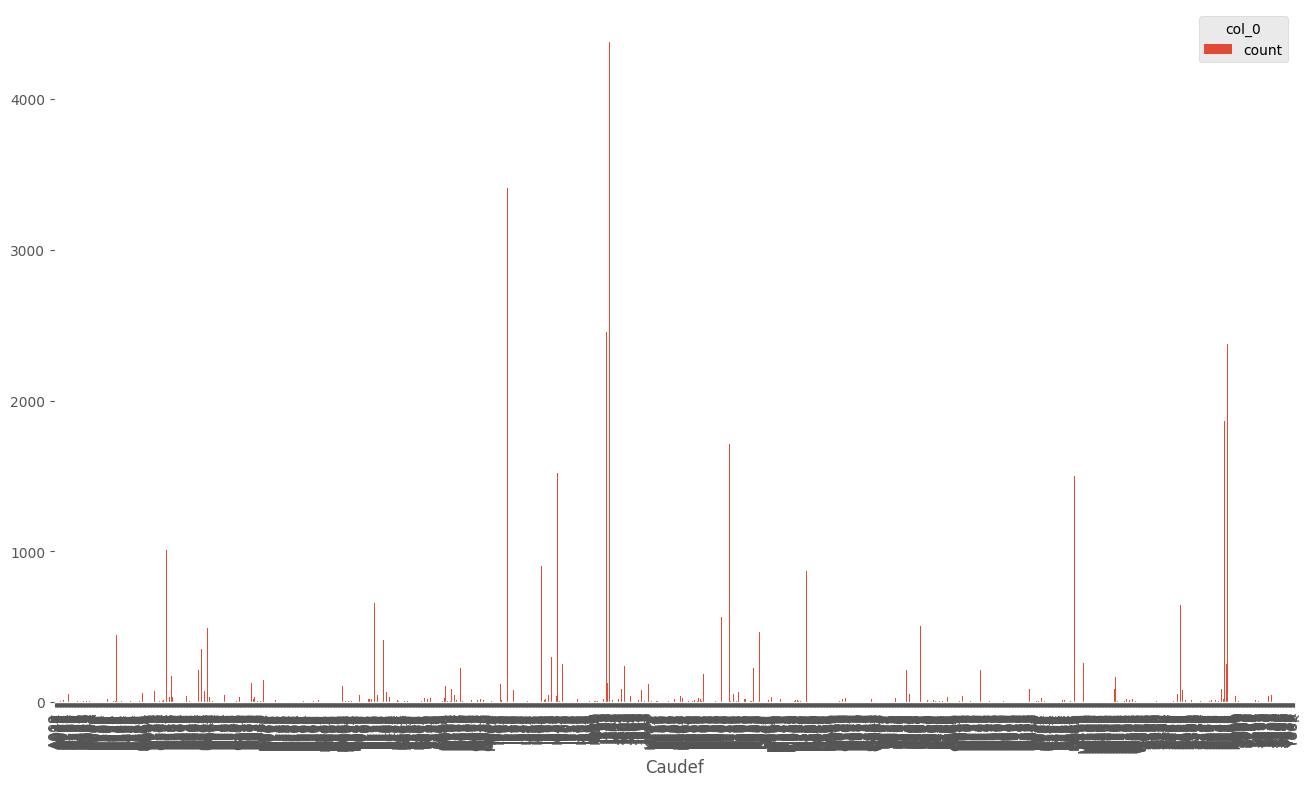

In [24]:
# crear la tabla de frecuencia para la variable "Caudef"
tabla_frecuencia = pd.crosstab(index=defunciones["Caudef"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

#El código utilizado para la causa de la muerte relacionada con el VIH/SIDA en la Clasificación Internacional de Enfermedades (CIE) es B20-B24.
# Seleccionar las filas correspondientes a los códigos B20-B24 y sumar sus frecuencias
frecuencia_B20 = tabla_frecuencia[tabla_frecuencia.index.str.contains("B20|B21|B22|B23|B24")].sum().values[0]

# Imprimir la frecuencia de los códigos B20-B24
print("La frecuencia de los códigos B20-B24 es:", frecuencia_B20)

tabla_frecuencia.plot.bar()

B20: Enfermedad por VIH con infección oportunista

B21: Enfermedad por VIH con tumores malignos

B22: Enfermedad por VIH con otras enfermedades infecciosas especificadas

B23: Enfermedad por VIH con otras enfermedades especificadas

B24: Enfermedad por VIH, sin otra especificación

Nota: se tomaron como referencia los códigos de la CIE-9.


col_0  count
Asist       
1      30390
2        232
3       1907
4      38989
9        189


<AxesSubplot:xlabel='Asist'>

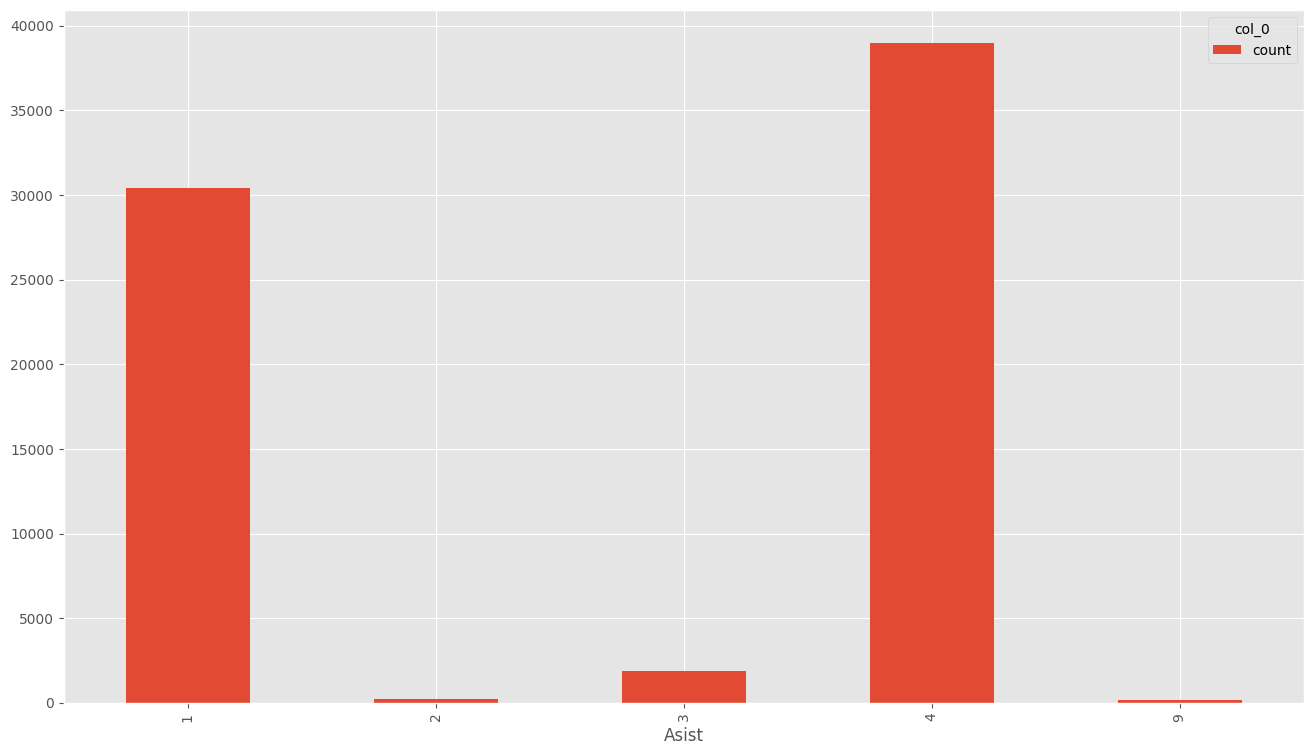

In [25]:
# crear la tabla de frecuencia para la variable "   Asist "
tabla_frecuencia = pd.crosstab(index=defunciones["Asist"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

1: Sin asistencia

2: Médico

3: enfermero

4: otro personal de salud

9: sin información

col_0  count
Ocur        
1      19662
2        386
3       6834
4      44376
9        449


<AxesSubplot:xlabel='Ocur'>

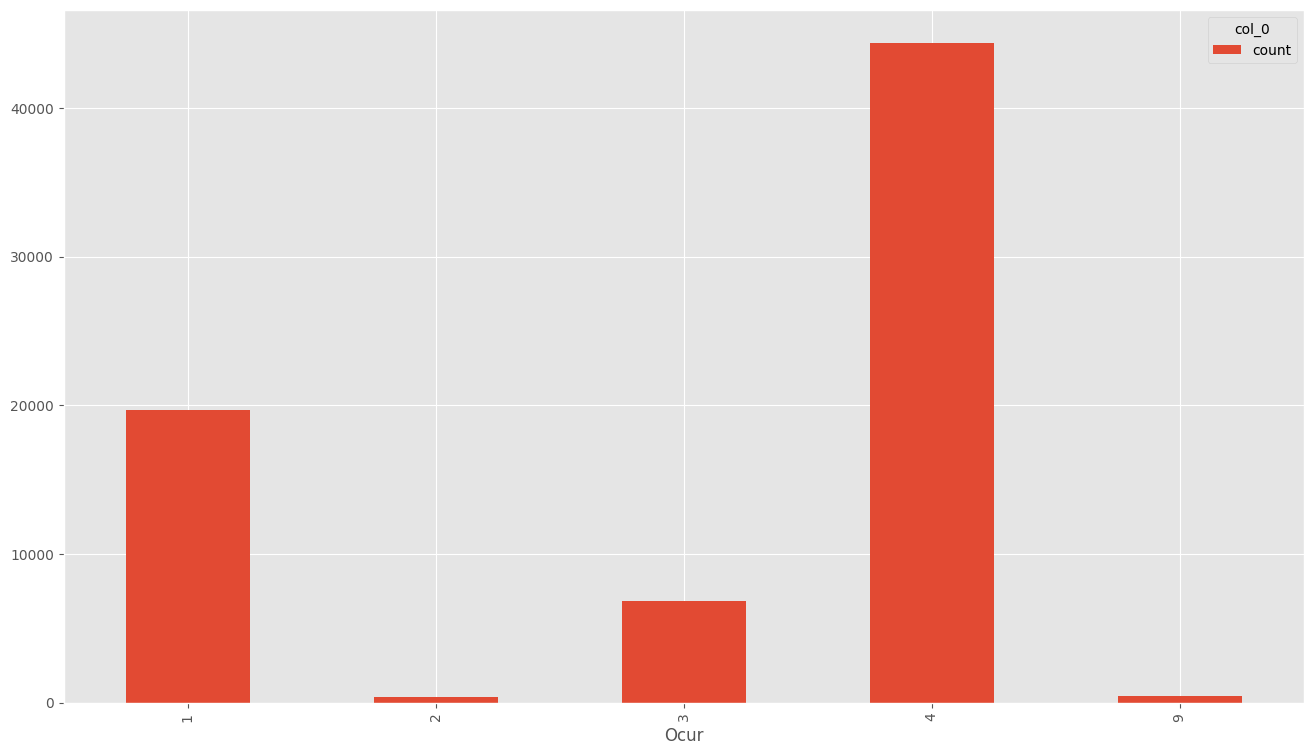

In [26]:
# crear la tabla de frecuencia para la variable "Ocur"
tabla_frecuencia = pd.crosstab(index=defunciones["Ocur"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

1: Hospital general

2: Hospital especializado

3: Casa particular o vivienda privada

4: Vía pública o lugar no especificado

9: Otros lugares o circunstancias

col_0   count
Cerdef       
1       50124
2        7000
9       14583


<AxesSubplot:xlabel='Cerdef'>

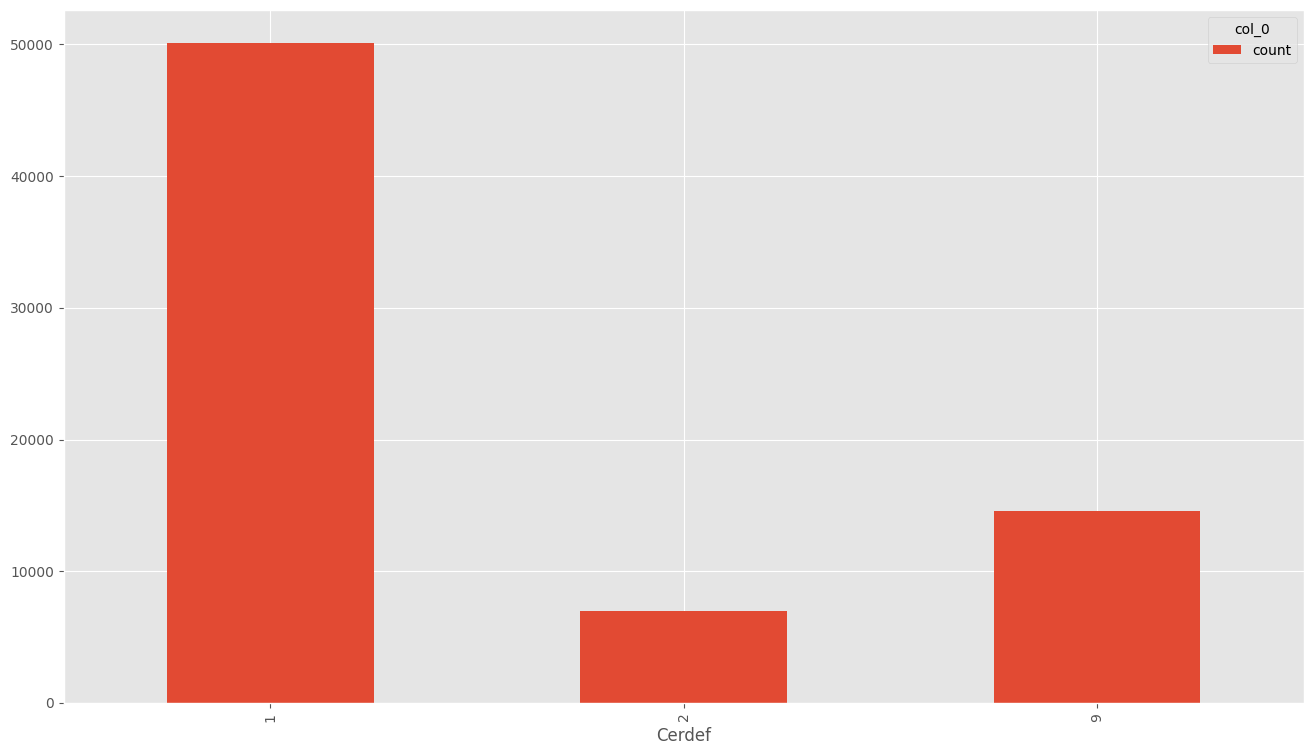

In [27]:
# crear la tabla de frecuencia para la variable "Cerdef"
tabla_frecuencia = pd.crosstab(index=defunciones["Cerdef"], columns="count")

# mostrar la tabla de frecuencia
print(tabla_frecuencia)

tabla_frecuencia.plot.bar()

1: Si

2: No

9: No se sabe.


-> Análisis de distribución de variables Cuantitativas

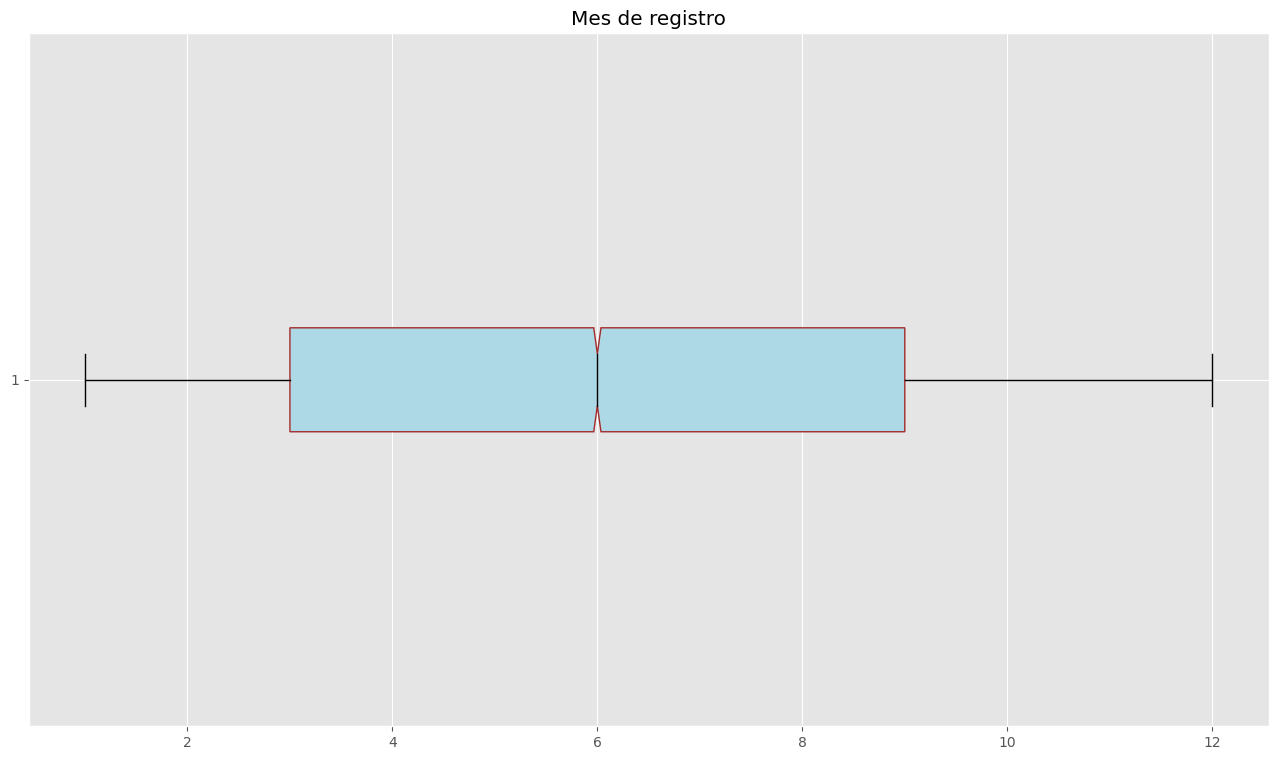

In [28]:
# crear el boxplot
plt.boxplot(defunciones['Mesreg'], 
            vert=False,    # colocar el gráfico en horizontal
            notch=True,    # dibujar una marca en el centro de cada caja
            patch_artist=True,    # rellenar las cajas con colores
            boxprops=dict(facecolor='lightblue', edgecolor='brown'),    # color y borde de las cajas
            flierprops=dict(marker='o', markersize=5, markerfacecolor='black'),    # estilo de los puntos fuera de las cajas
            medianprops=dict(color='black'),    # estilo de las líneas medianas
            whiskerprops=dict(color='black'),    # estilo de los bigotes
            capprops=dict(color='black')    # estilo de las líneas que terminan los bigotes
           )

# establecer el título del gráfico
plt.title("Mes de registro")

# mostrar el gráfico
plt.show()

No existen datos atípicos en las variables cuantitativas.

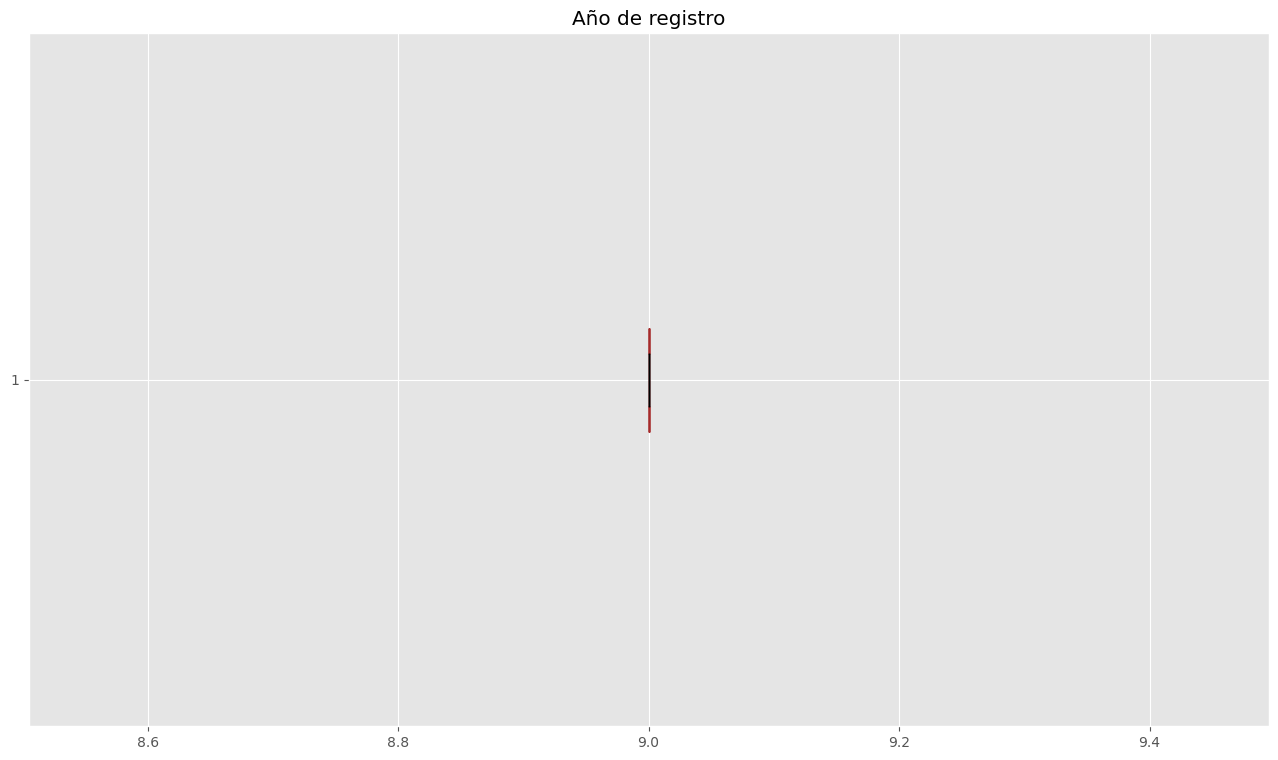

In [29]:
# crear el boxplot
plt.boxplot(defunciones['Añoocu'], 
            vert=False,    # colocar el gráfico en horizontal
            notch=True,    # dibujar una marca en el centro de cada caja
            patch_artist=True,    # rellenar las cajas con colores
            boxprops=dict(facecolor='lightblue', edgecolor='brown'),    # color y borde de las cajas
            flierprops=dict(marker='o', markersize=5, markerfacecolor='black'),    # estilo de los puntos fuera de las cajas
            medianprops=dict(color='black'),    # estilo de las líneas medianas
            whiskerprops=dict(color='black'),    # estilo de los bigotes
            capprops=dict(color='black')    # estilo de las líneas que terminan los bigotes
           )

# establecer el título del gráfico
plt.title("Año de registro")

# mostrar el gráfico
plt.show()

Todos los registros del excel de las defunciones ocurrieron en 2009.

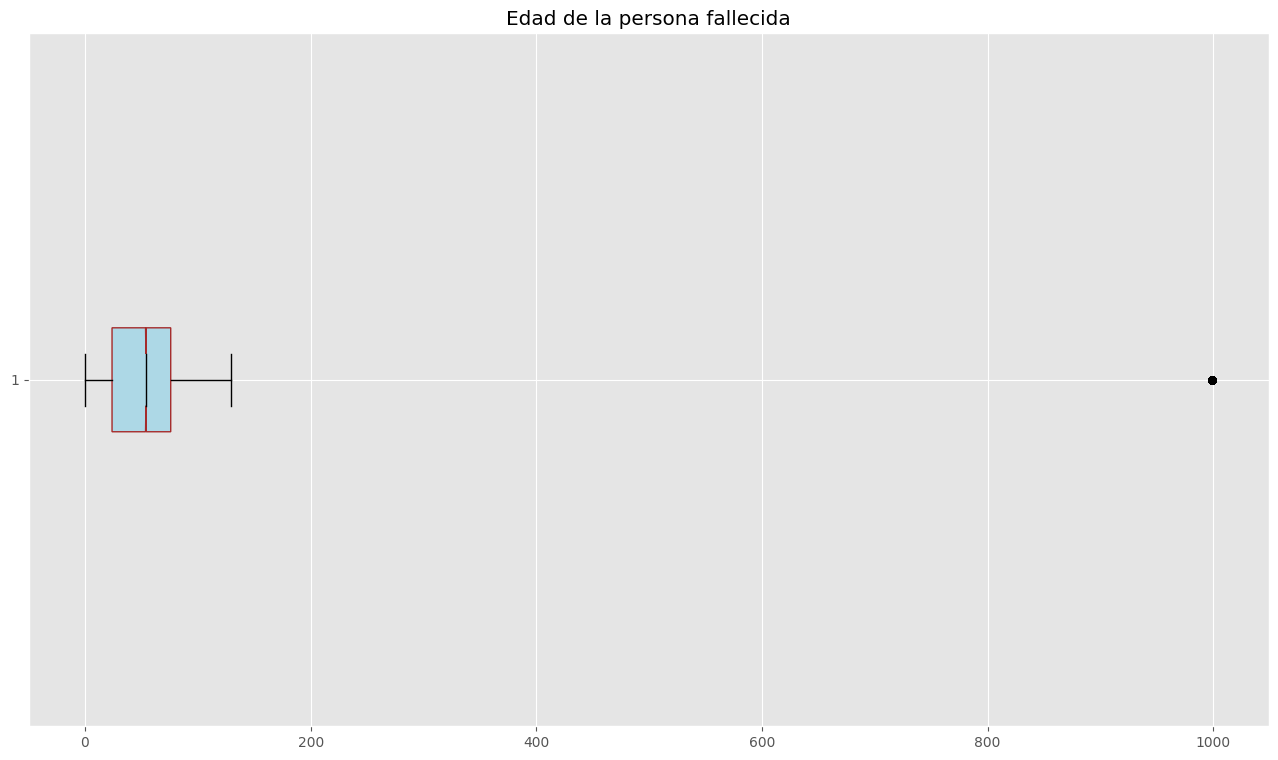

In [30]:
# crear el boxplot
plt.boxplot(defunciones['Edadif'], 
            vert=False,    # colocar el gráfico en horizontal
            notch=True,    # dibujar una marca en el centro de cada caja
            patch_artist=True,    # rellenar las cajas con colores
            boxprops=dict(facecolor='lightblue', edgecolor='brown'),    # color y borde de las cajas
            flierprops=dict(marker='o', markersize=5, markerfacecolor='black'),    # estilo de los puntos fuera de las cajas
            medianprops=dict(color='black'),    # estilo de las líneas medianas
            whiskerprops=dict(color='black'),    # estilo de los bigotes
            capprops=dict(color='black')    # estilo de las líneas que terminan los bigotes
           )

# establecer el título del gráfico
plt.title("Edad de la persona fallecida")

# mostrar el gráfico
plt.show()

Existe un dato atípico en la variable edadif, el cual es 9999, que corresponde a un valor desconocido.

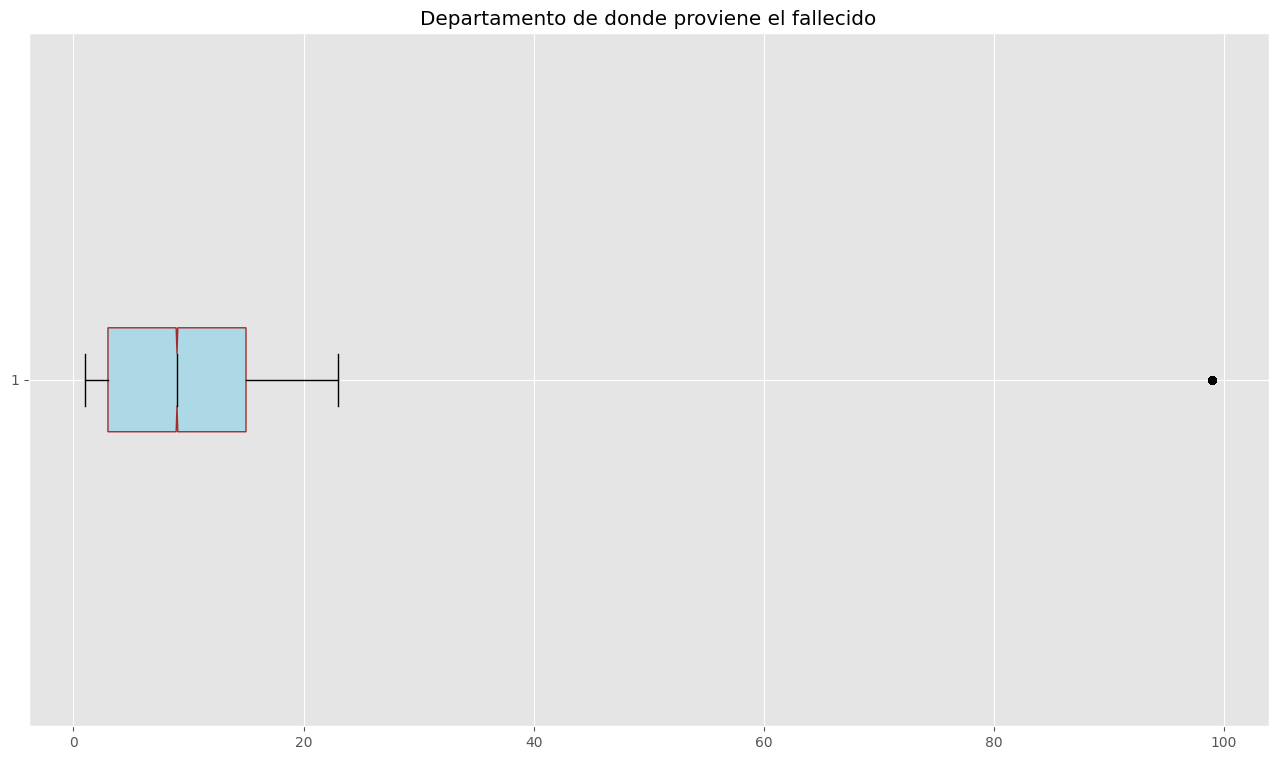

In [31]:
# crear el boxplot
plt.boxplot(defunciones['Dredif'], 
            vert=False,    # colocar el gráfico en horizontal
            notch=True,    # dibujar una marca en el centro de cada caja
            patch_artist=True,    # rellenar las cajas con colores
            boxprops=dict(facecolor='lightblue', edgecolor='brown'),    # color y borde de las cajas
            flierprops=dict(marker='o', markersize=5, markerfacecolor='black'),    # estilo de los puntos fuera de las cajas
            medianprops=dict(color='black'),    # estilo de las líneas medianas
            whiskerprops=dict(color='black'),    # estilo de los bigotes
            capprops=dict(color='black')    # estilo de las líneas que terminan los bigotes
           )

# establecer el título del gráfico
plt.title("Departamento de donde proviene el fallecido")

# mostrar el gráfico
plt.show()

Existe un dato atípico en la variable Dredif, el cual es 99, que corresponde a un valor desconocido.
La media de dedrif es 5, lo cual indica que la mayoría de fallecidos provenían de Sacatepéqequez.


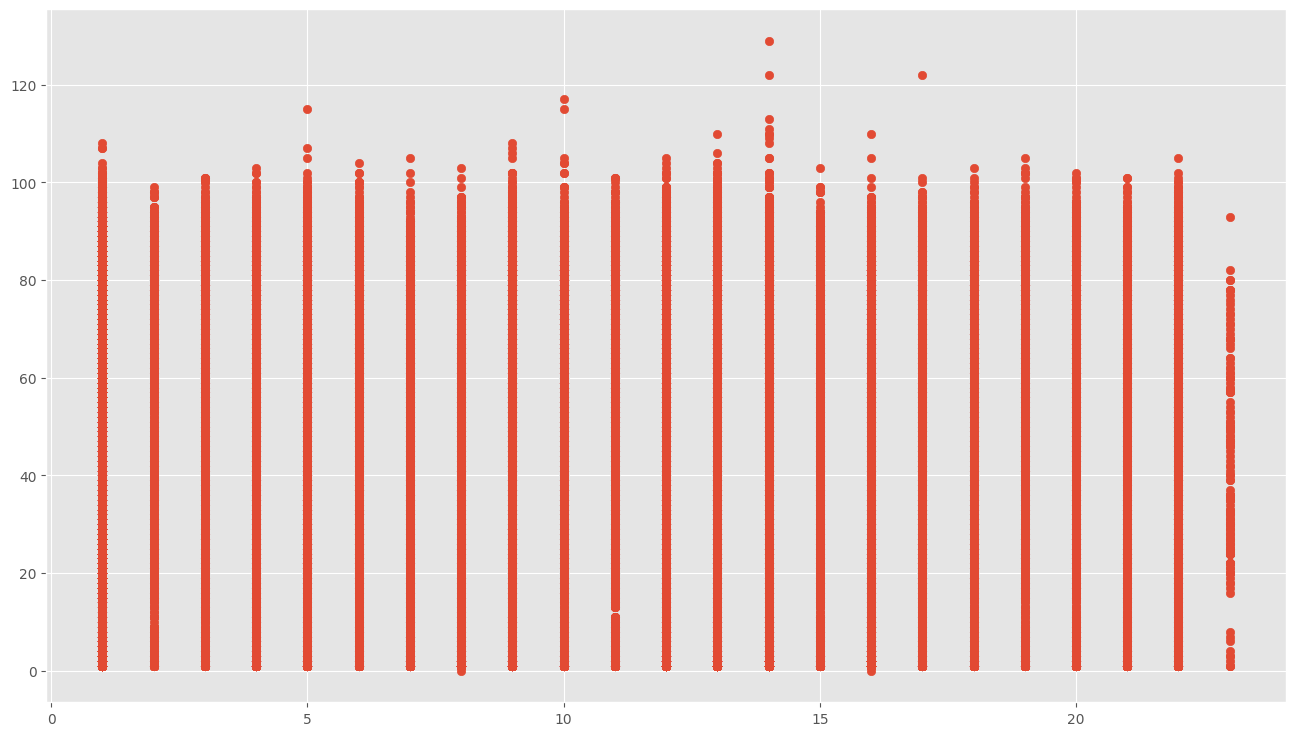

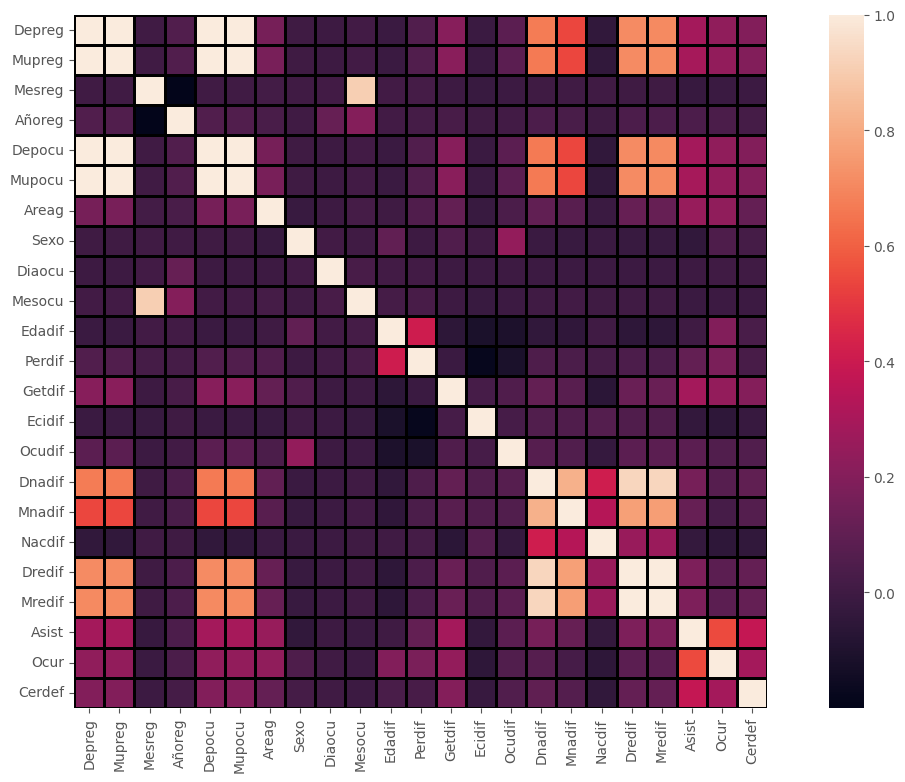

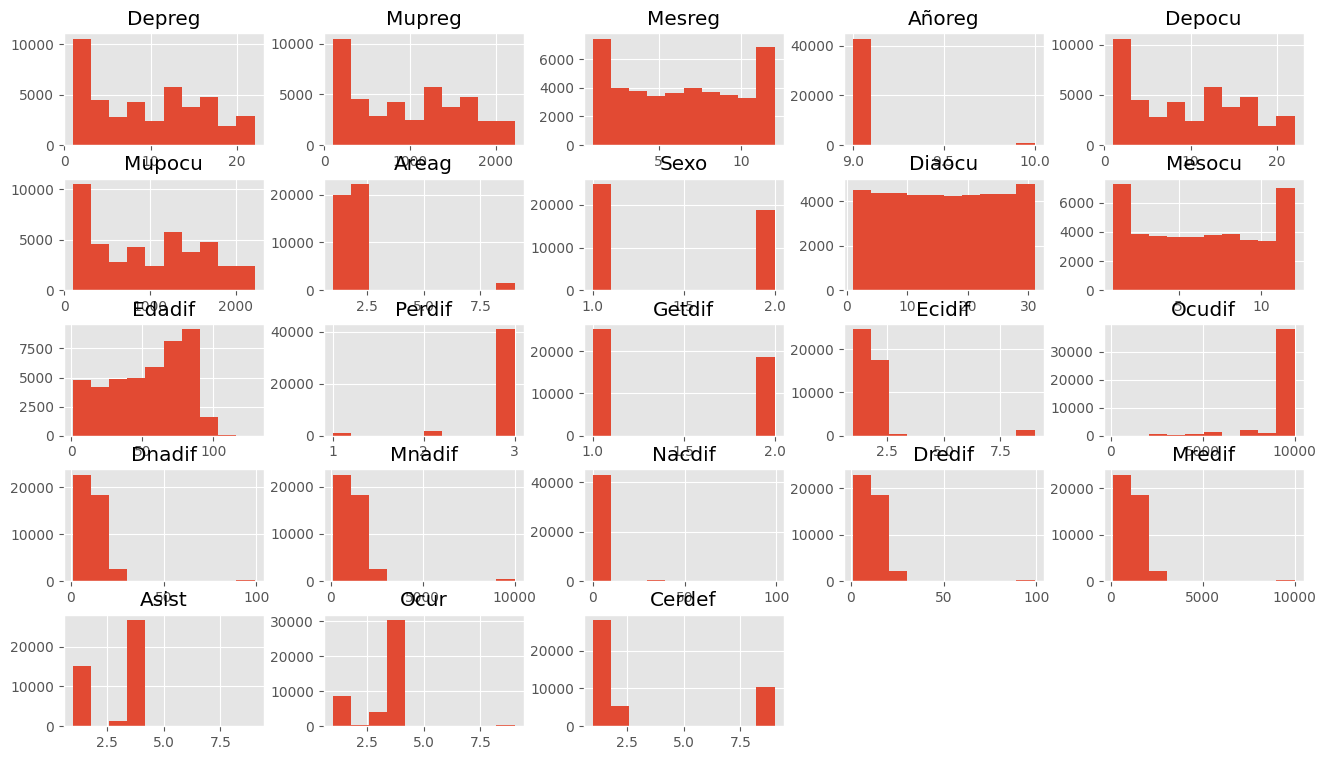

In [93]:
#Hacer grafico de dispersion de la edad de la persona fallecida y el departamento de donde proviene el fallecido
new_df = defunciones[['Dredif' ,'Edadif']]
new_df = new_df.loc[(new_df['Dredif']<99) & (new_df['Edadif']<999)]

x = new_df['Dredif']


y = new_df['Edadif']


plt.scatter(x,y)
plt.show()


# correlaciones genero, edad y departamento de residencia 
df1 = defunciones.drop(["Añoocu","Caudef"], axis=1)
df1 = df1.loc[df1["Edadif"]<200]
df1 = df1.loc[df1["Getdif"]<9]
df1 = df1.loc[df1["Ecidif"]<9]
corr_matrix = df1.corr()
sn.heatmap(corr_matrix, annot=False, linecolor="black",linewidths=1,square=True)
plt.show()

df1.hist()
plt.show()




#metodo de silueta 
 

In [94]:

X = np.array(df1[["Edadif", "Dnadif", "Mesocu", "Getdif", "Dredif", "Ecidif", "Ocur", "Asist", "Areag", "Cerdef"]])
x_prueba = np.array(df1[["Getdif", "Dnadif", "Nacdif", "Asist", "Ocur", "Perdif"]])
random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

pyclustertend.hopkins(X,len(X))

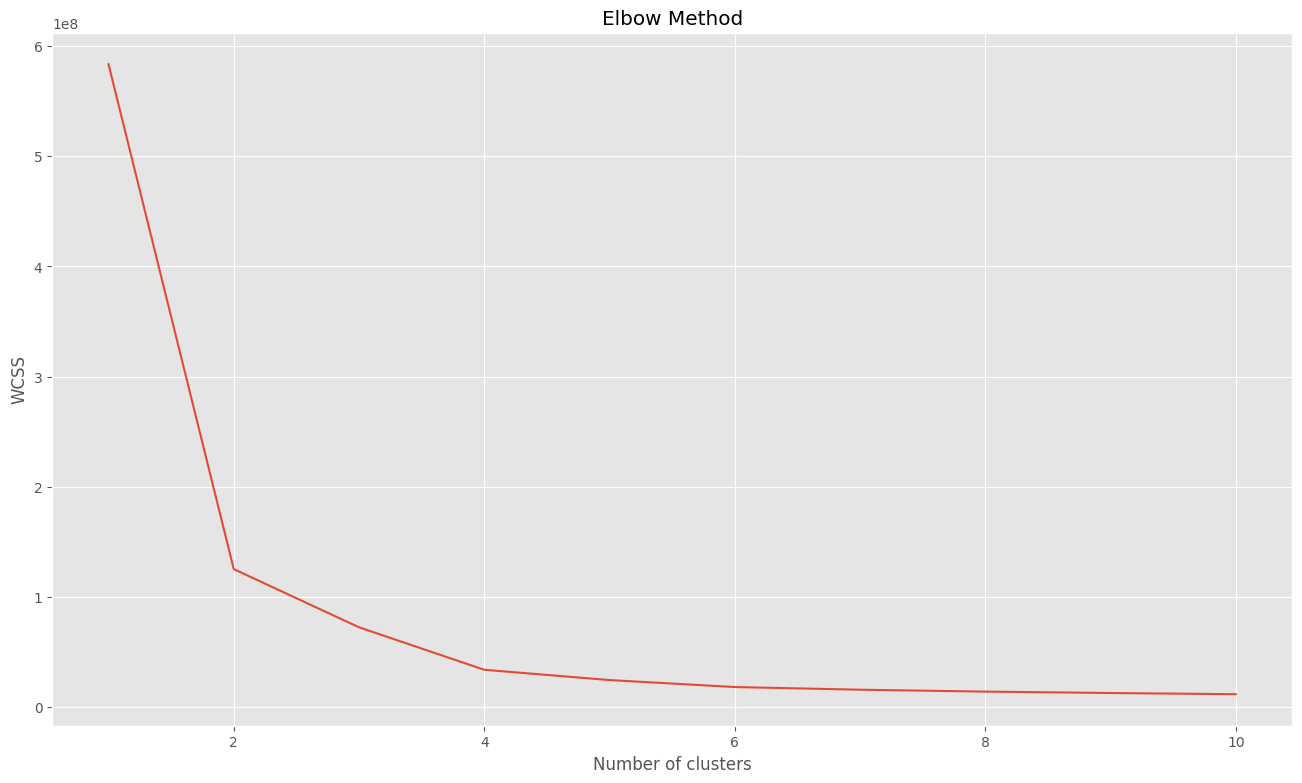

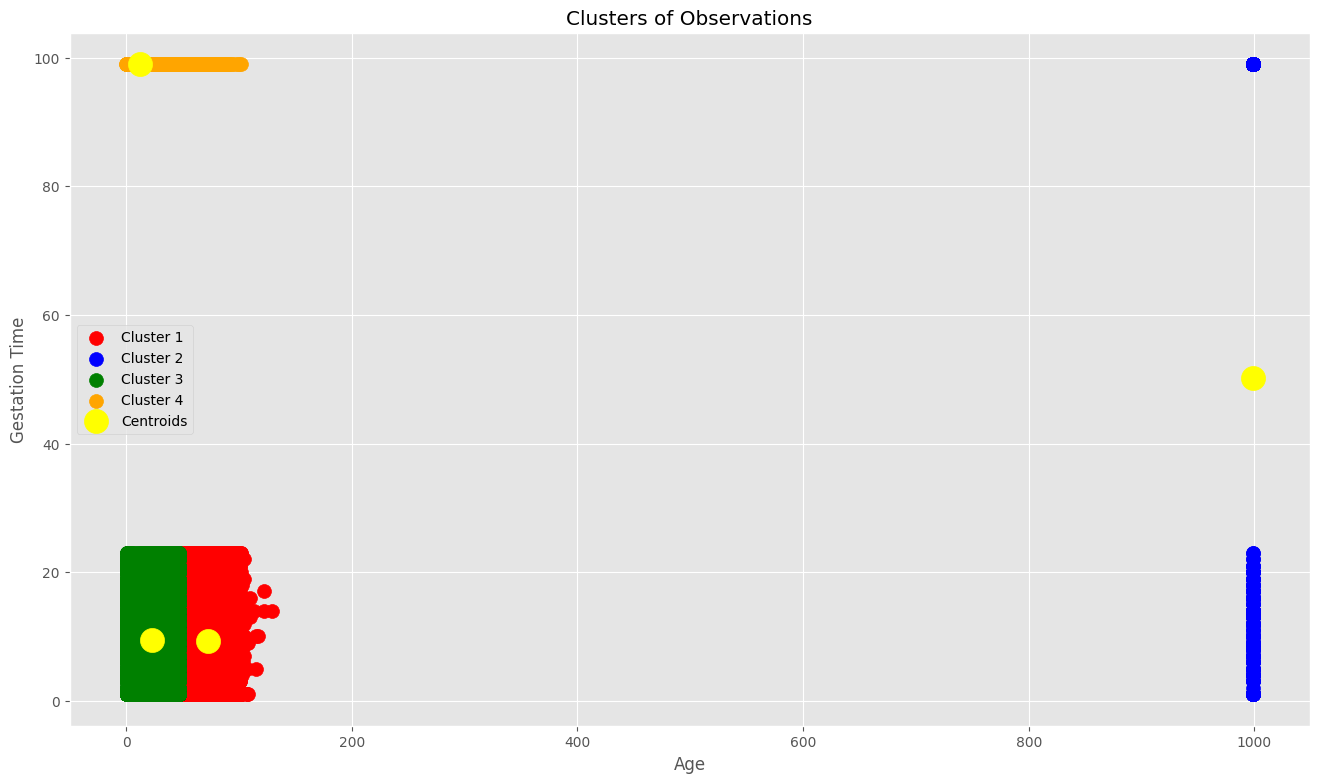

In [85]:
# Preprocess the data
# Handle missing values, scale the data, and encode categorical variables if necessary

# Determine the number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-means model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Observations')
plt.xlabel('Age')
plt.ylabel('Gestation Time')
plt.legend()
plt.show()


KeyboardInterrupt: 

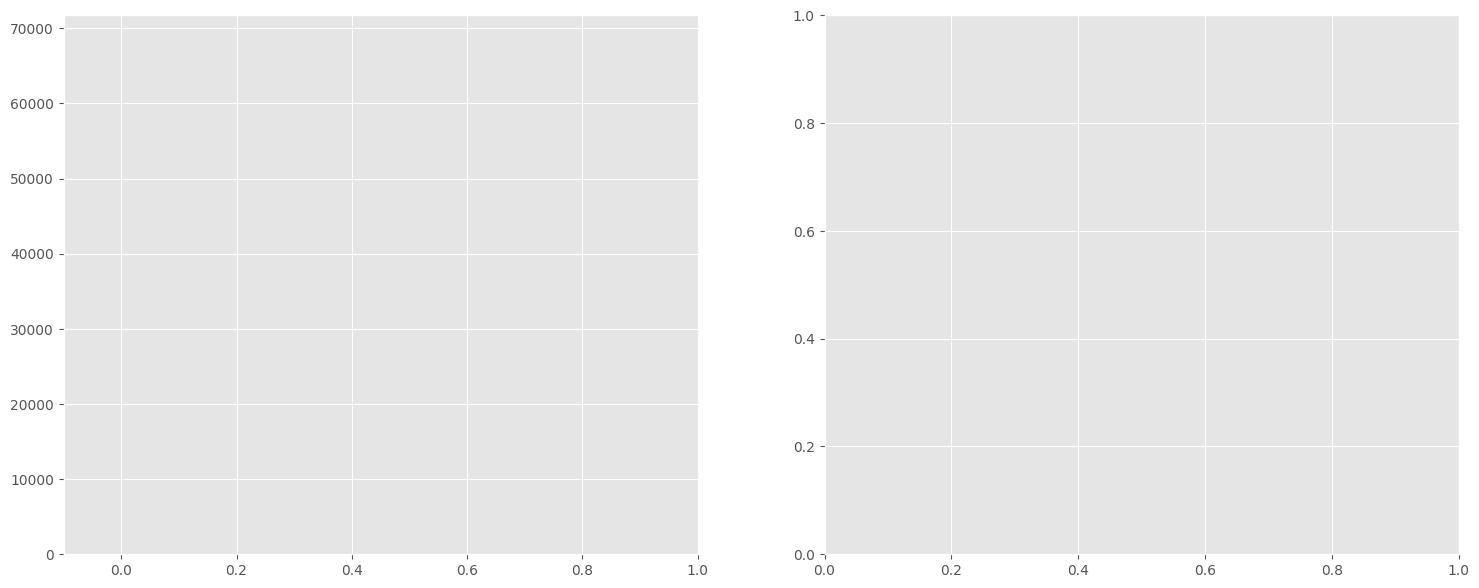

In [82]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2,3,4,5,6]
X
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
km = cluster.KMeans(n_clusters=2).fit(X)
print (km)
centroides = km.cluster_centers_
print(centroides)

y = km.predict(X)
y


KMeans(n_clusters=2)
[[  1.679055    49.34754762   4.35400865   1.65672229  11.61705714]
 [  1.81604697 999.           6.0332681    2.79060665  30.71232877]]


array([0, 0, 0, ..., 1, 1, 1])